# Metrikker for evaluering av regresjonsmodeller

In [3]:
import numpy as np
import os
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

Funksjonen mean squared error gir oss en metrikk som beskriver den forventede kvadratiske feilen / forskjellen mellom $\hat{y}$ og $y$. Den beste mulige score er 0 og metrikken er definert ved:

$$
MSE(y,\hat{y}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2,
$$

$R^2$-skår gir et mål på hvor sannsynlig det er at fremtidge observasjoner vil bli korrekt predikert av modellen. Den beste mulige skåren for denne metrikken er 1.0. En modell som kun predikerer den forventede verdien av $y$, uansett input-variabel $\textbf{X}$ vil få en skår lik 0. Skåren kan også være negativ (også mindre enn -1). $R^2$-skår er definert ved:
 

$$
R^2(y, \hat{y}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \hat{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

En siste metrikk som kan være nyttig å holde et øye med ved trening og utvikling av regresjonsmodeller er mean absolute error (MAE). Denne metrikken gir den forventede feilen for modellen vår. MAE er definert som: 

$$
\text{MAE}(y, \hat{y}) = \frac{1}{n} \sum_{i=0}^{n-1} \left| y_i - \hat{y}_i \right|.
$$

In [5]:
from sklearn.metrics import r2_score,  mean_squared_error, mean_absolute_error

In [6]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [7]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

# Make data set
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

x_mesh, y_mesh = np.meshgrid(x, y)
z = f(x_mesh, y_mesh)

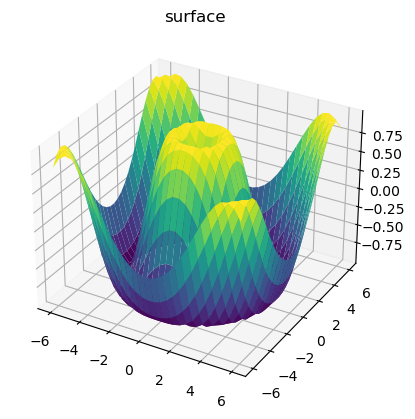

In [9]:
ax = plt.axes(projection='3d')
ax.plot_surface(x_mesh, y_mesh, z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

C:\Users\DianaP\AppData\Local\Temp\ipykernel_47128\3018906137.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(32,10))


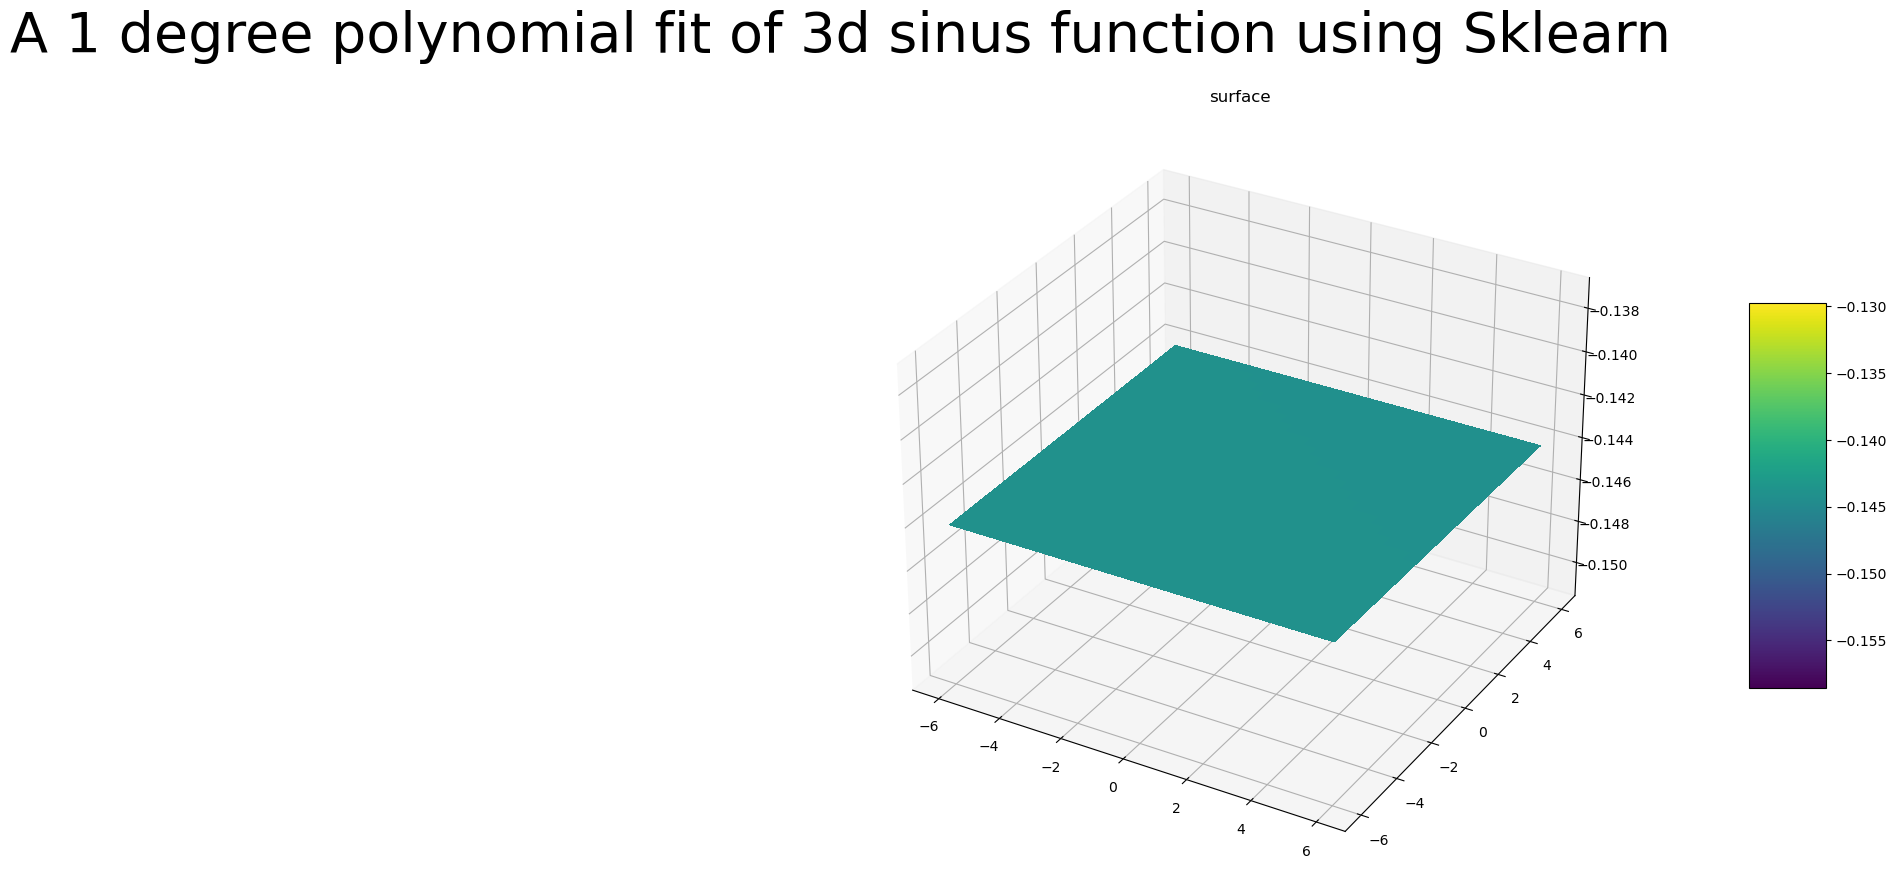

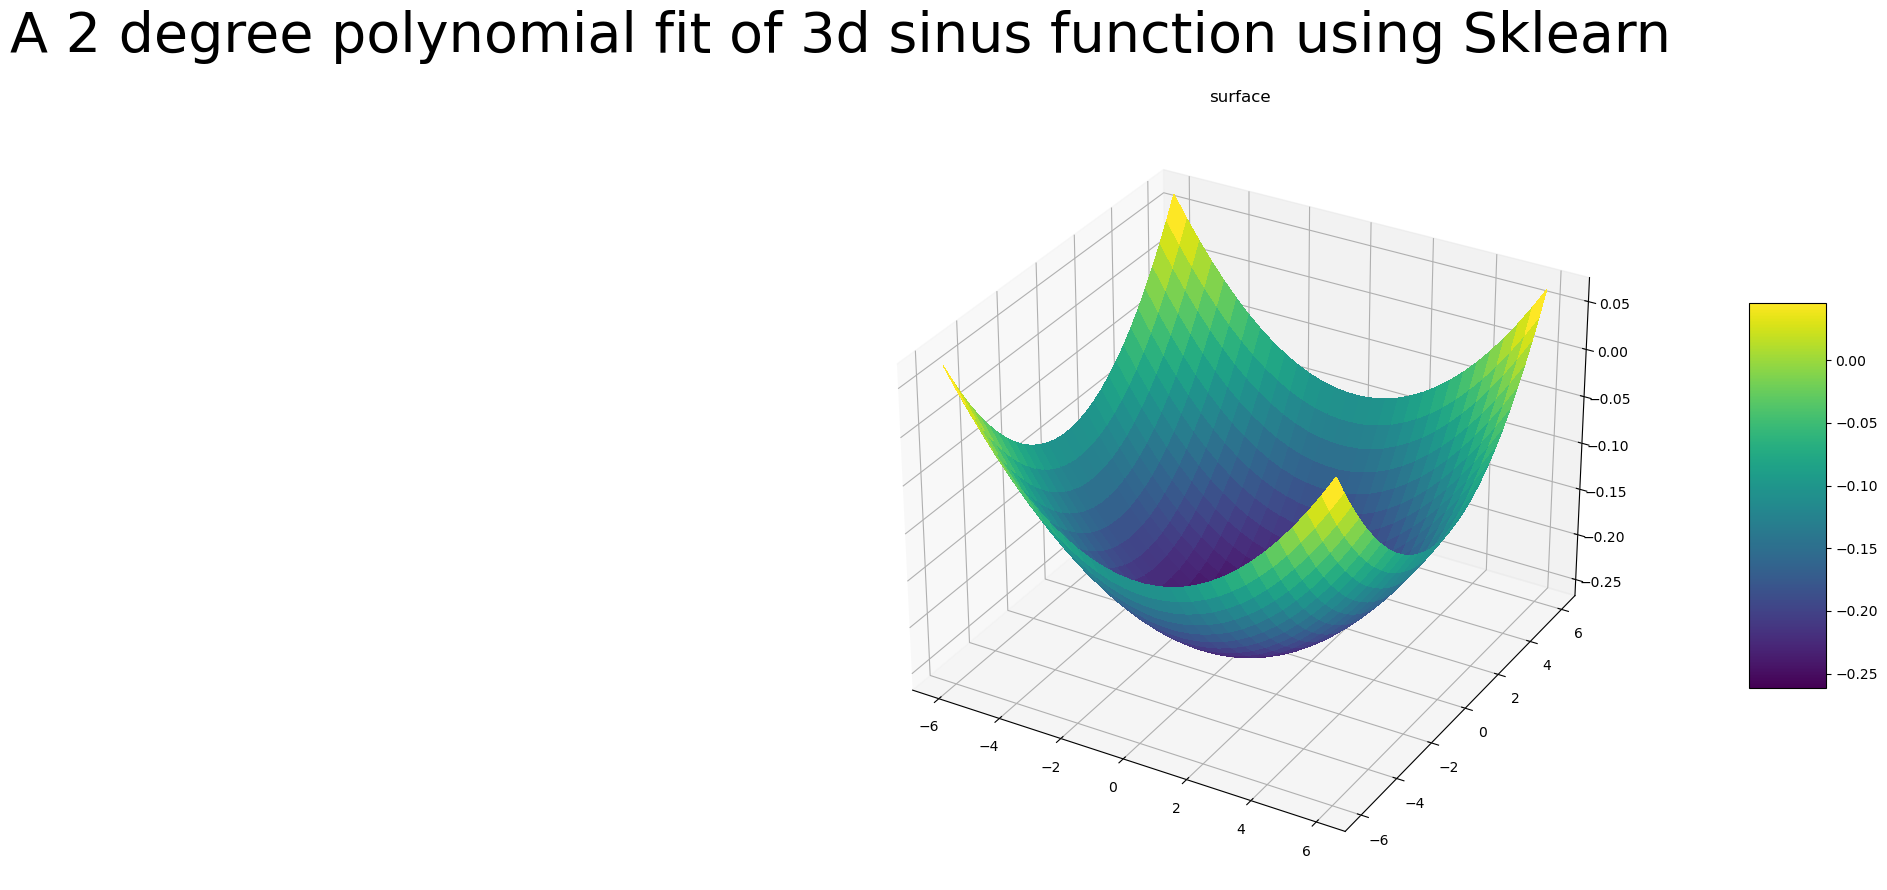

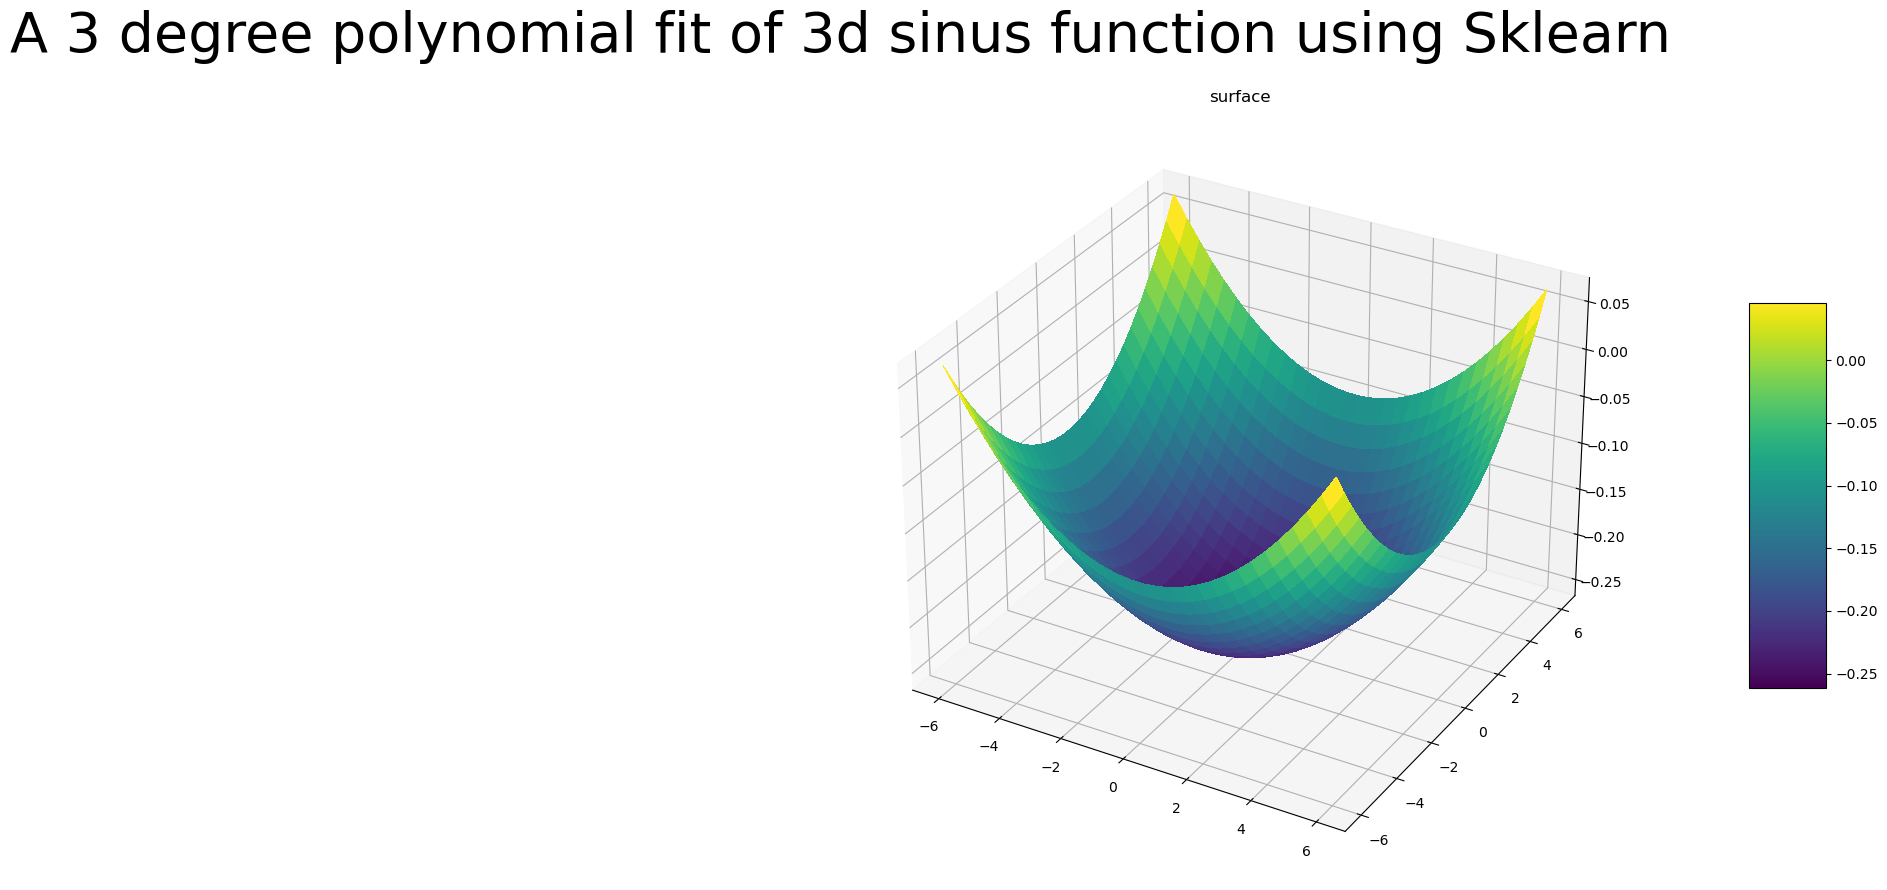

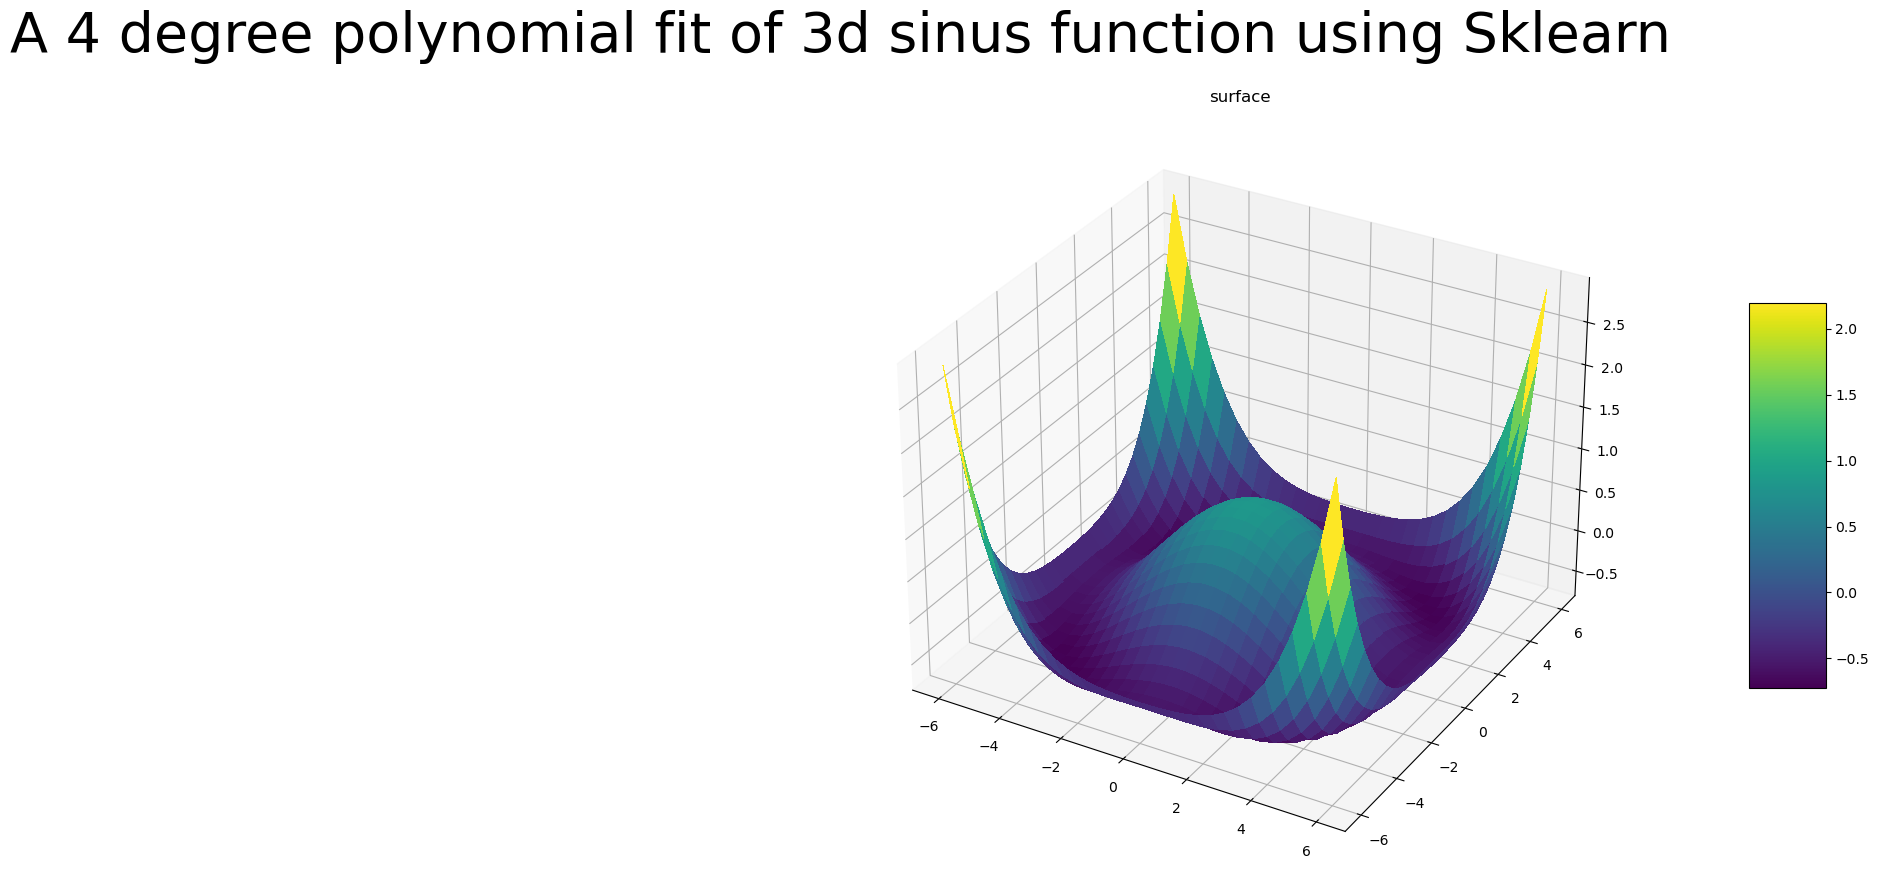

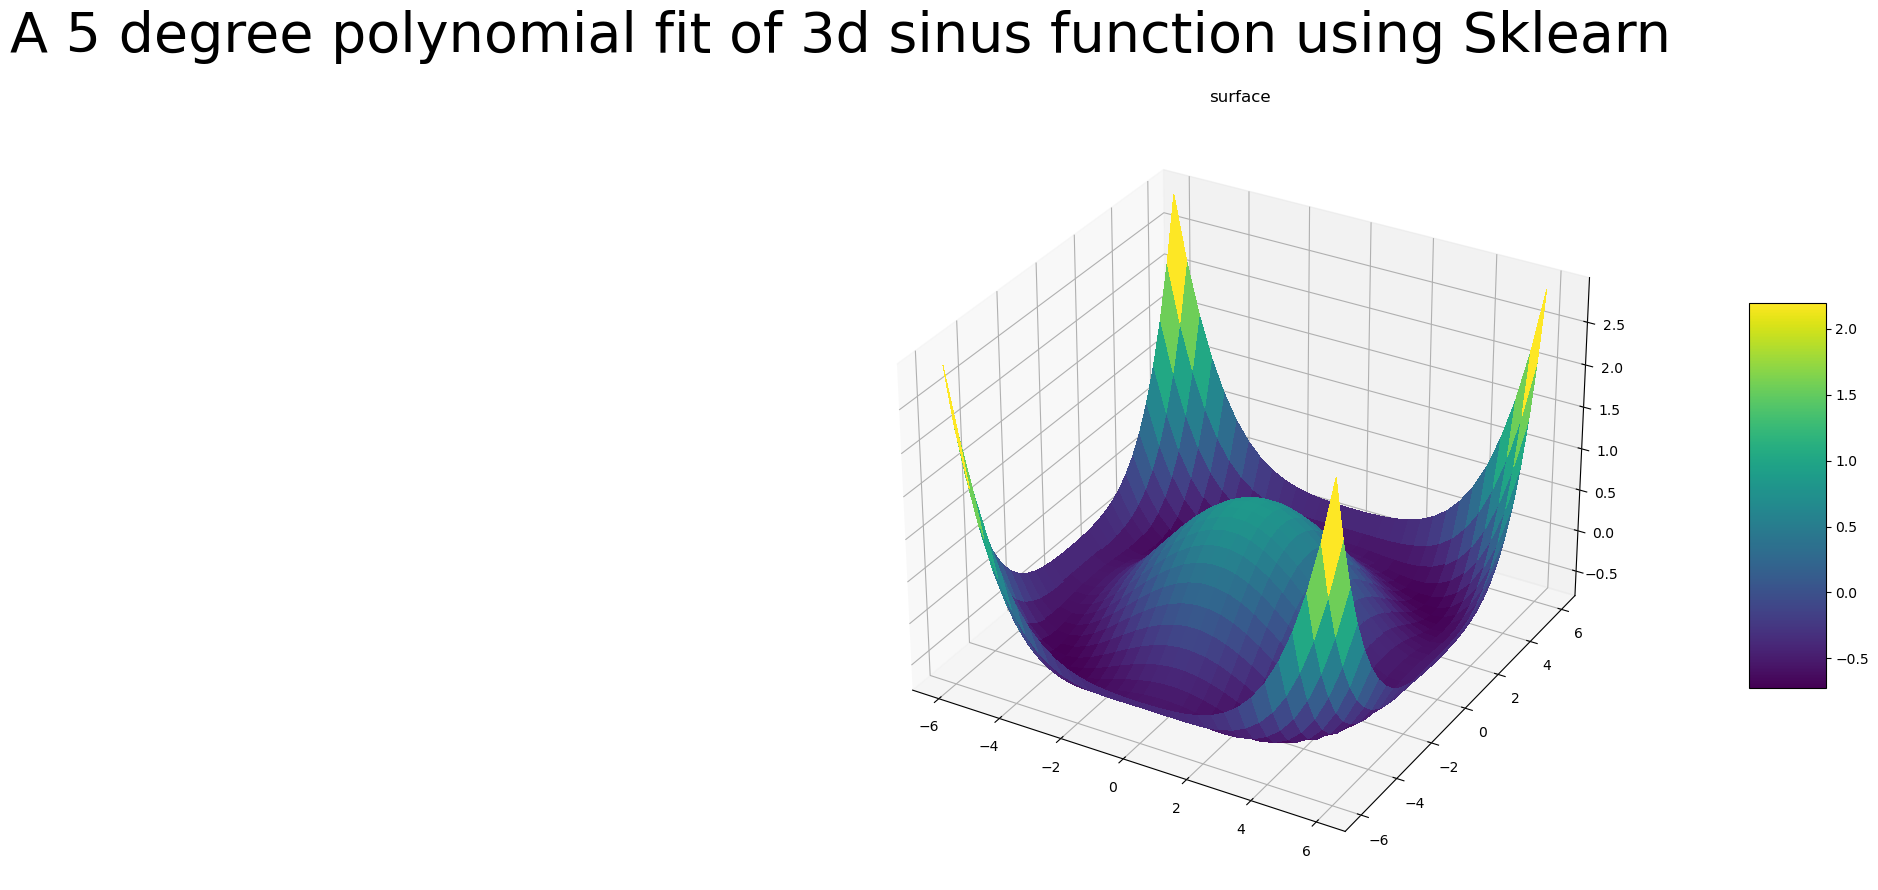

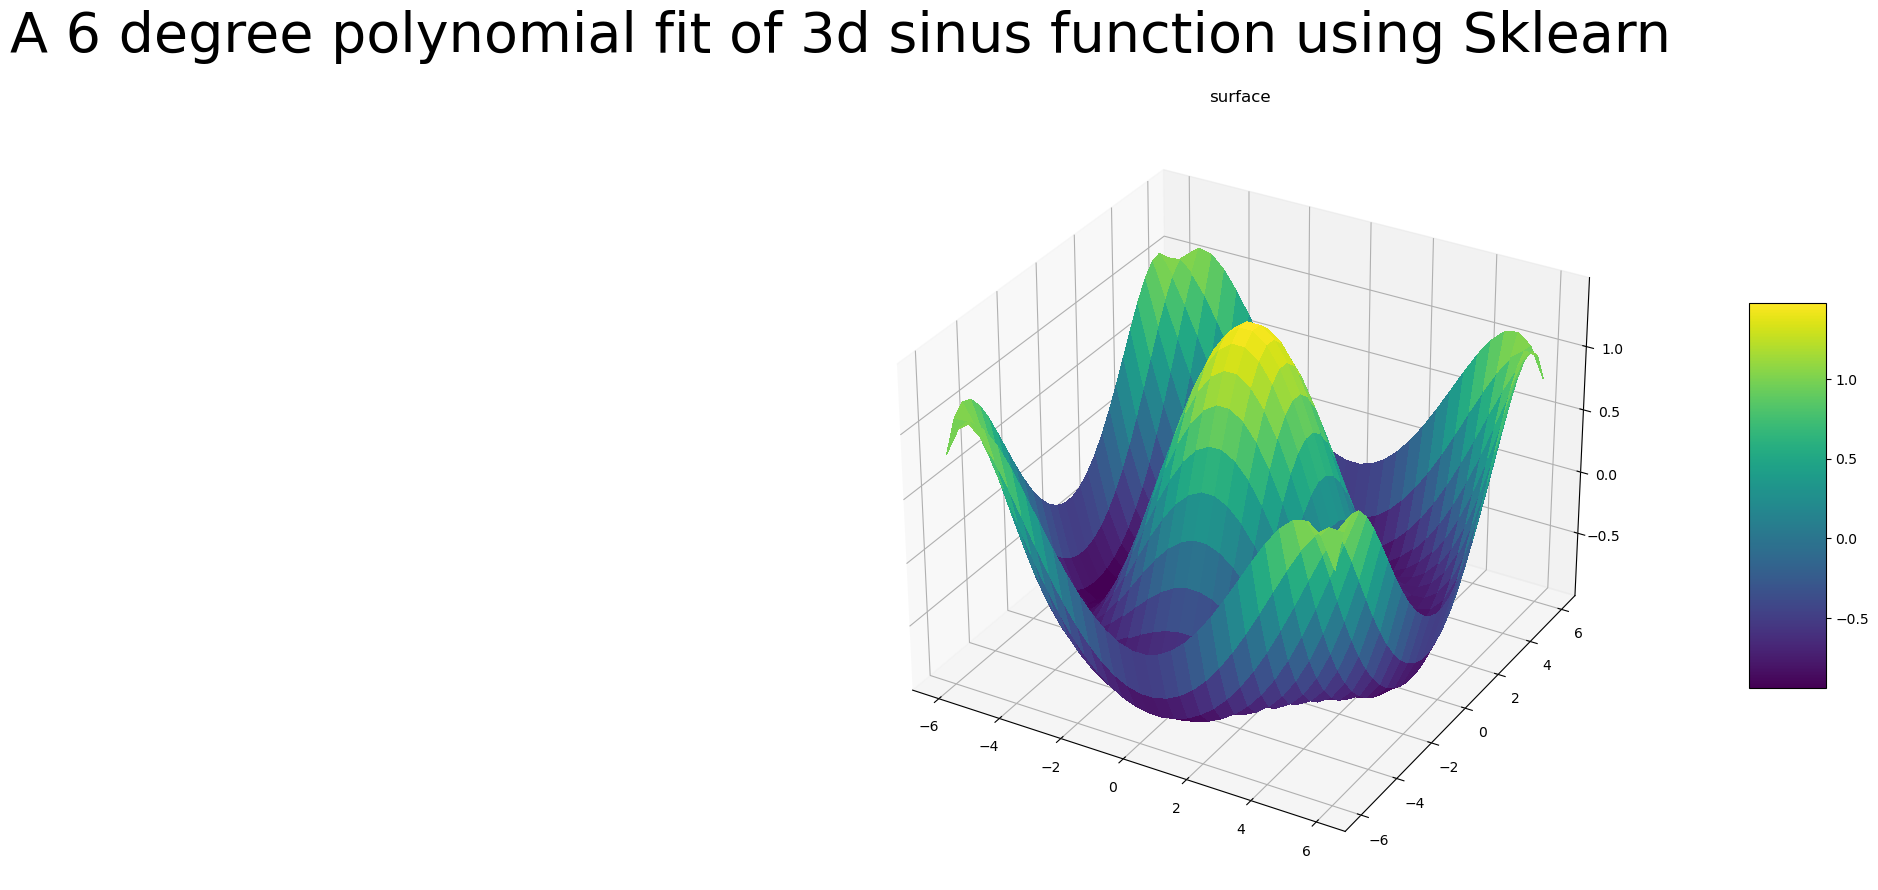

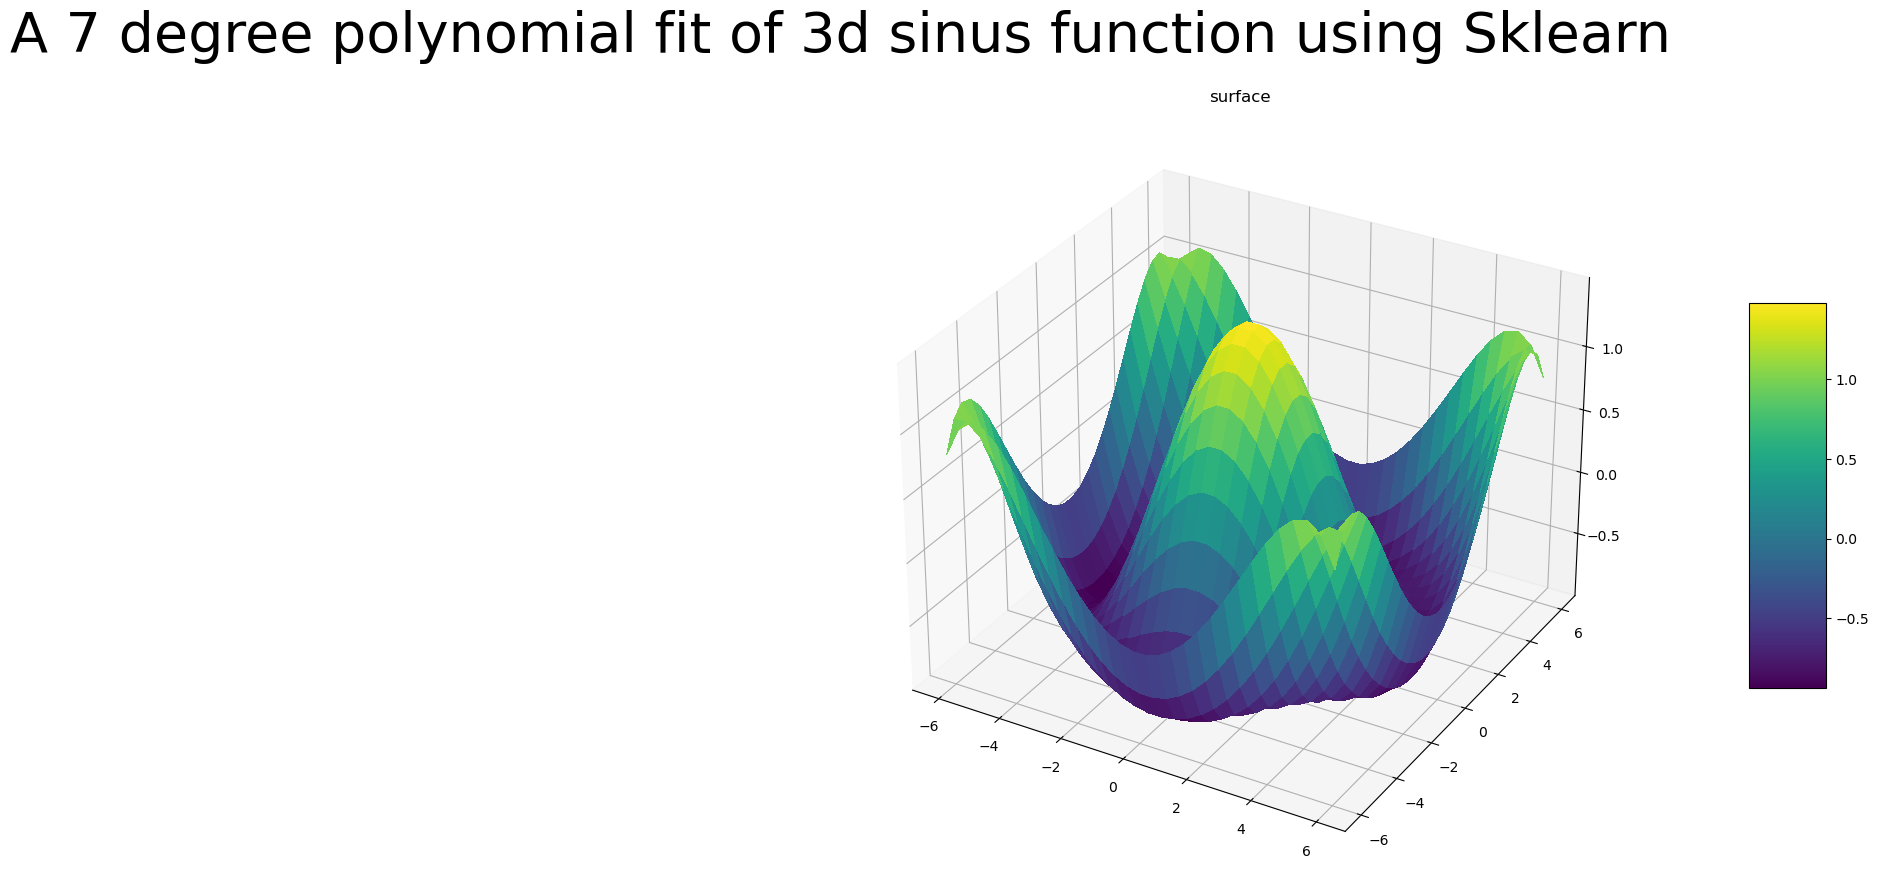

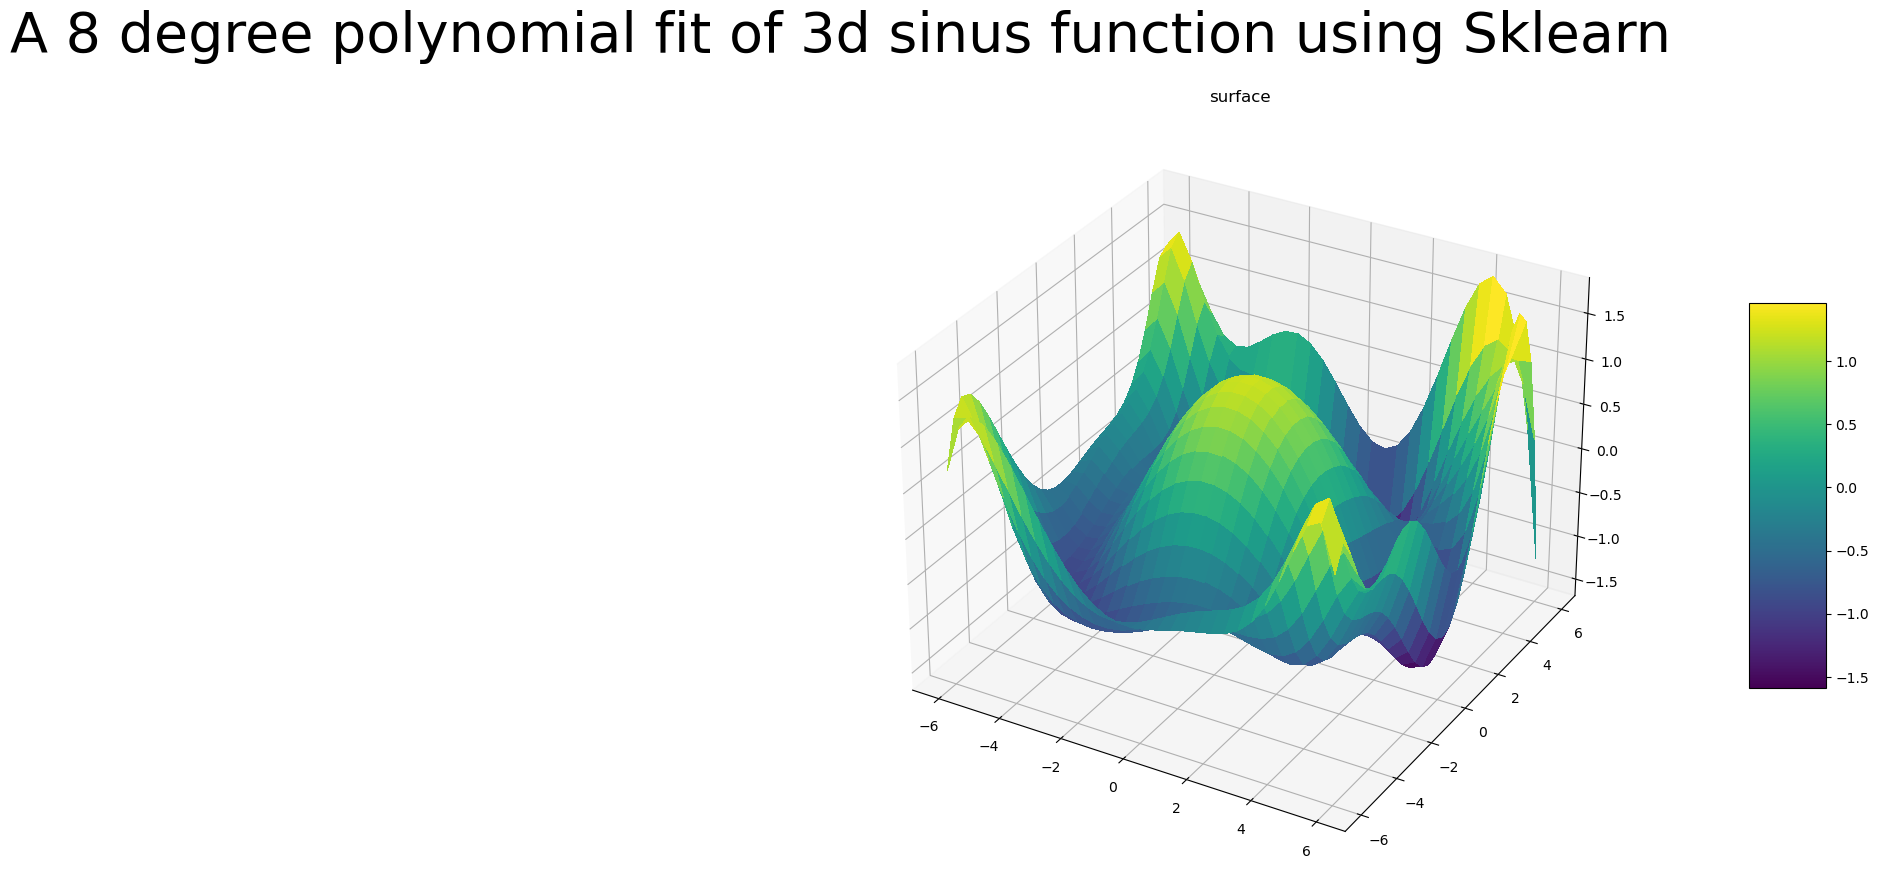

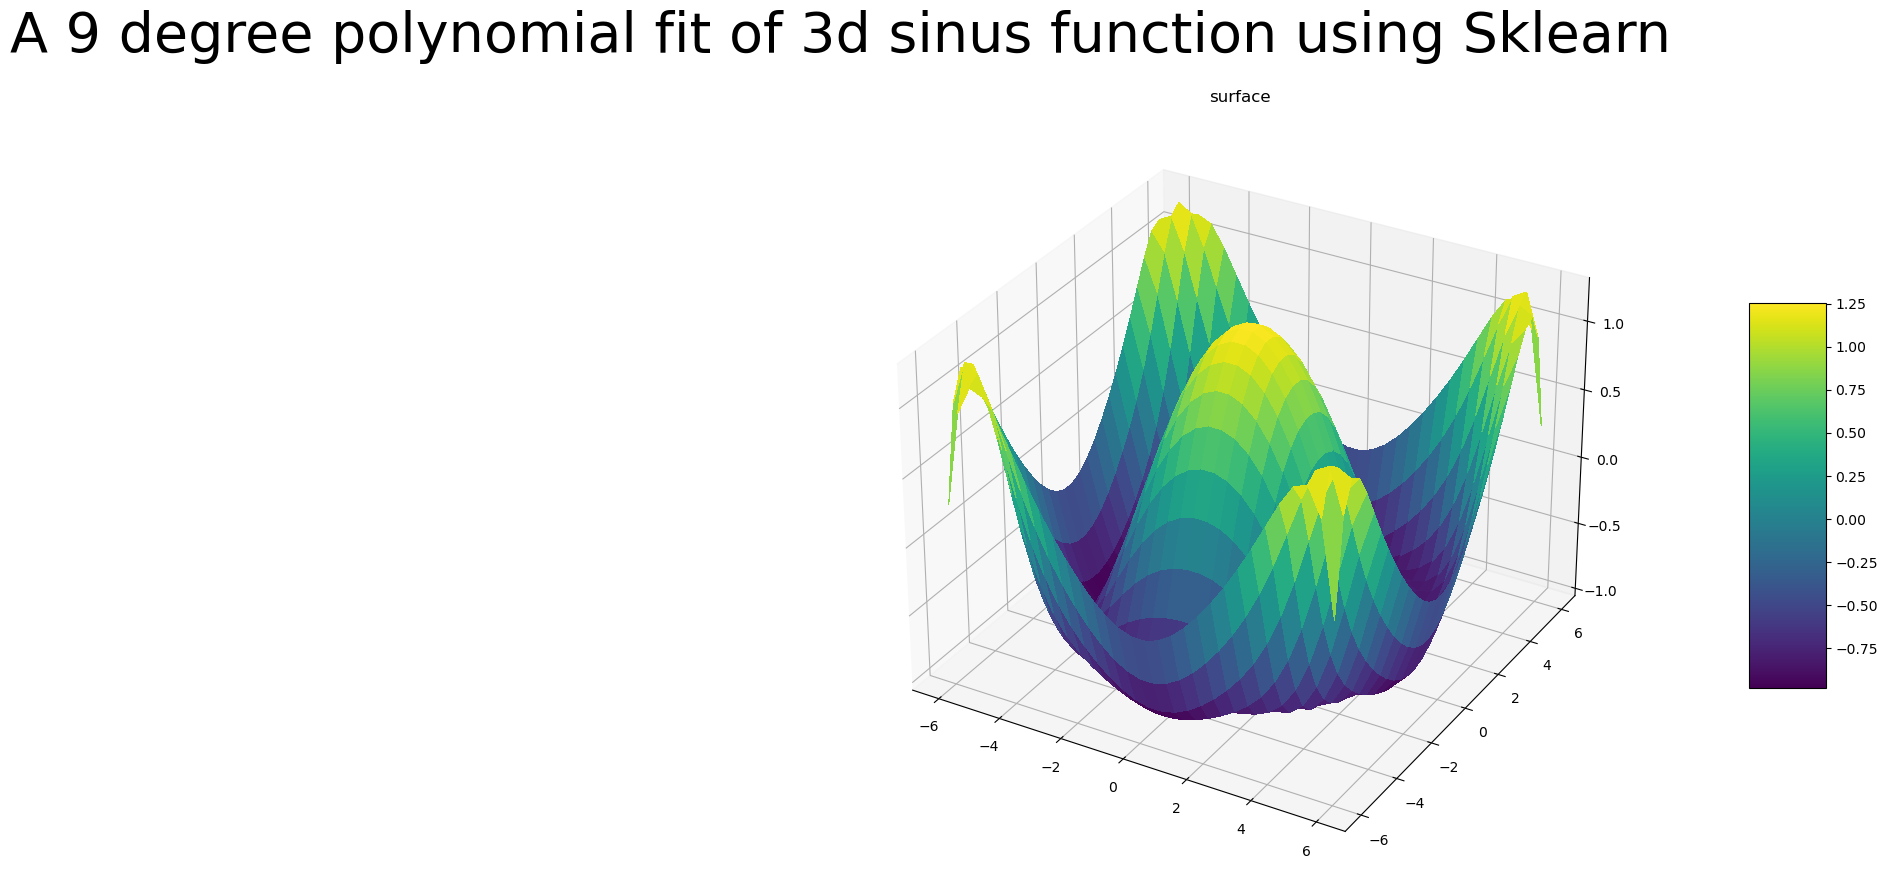

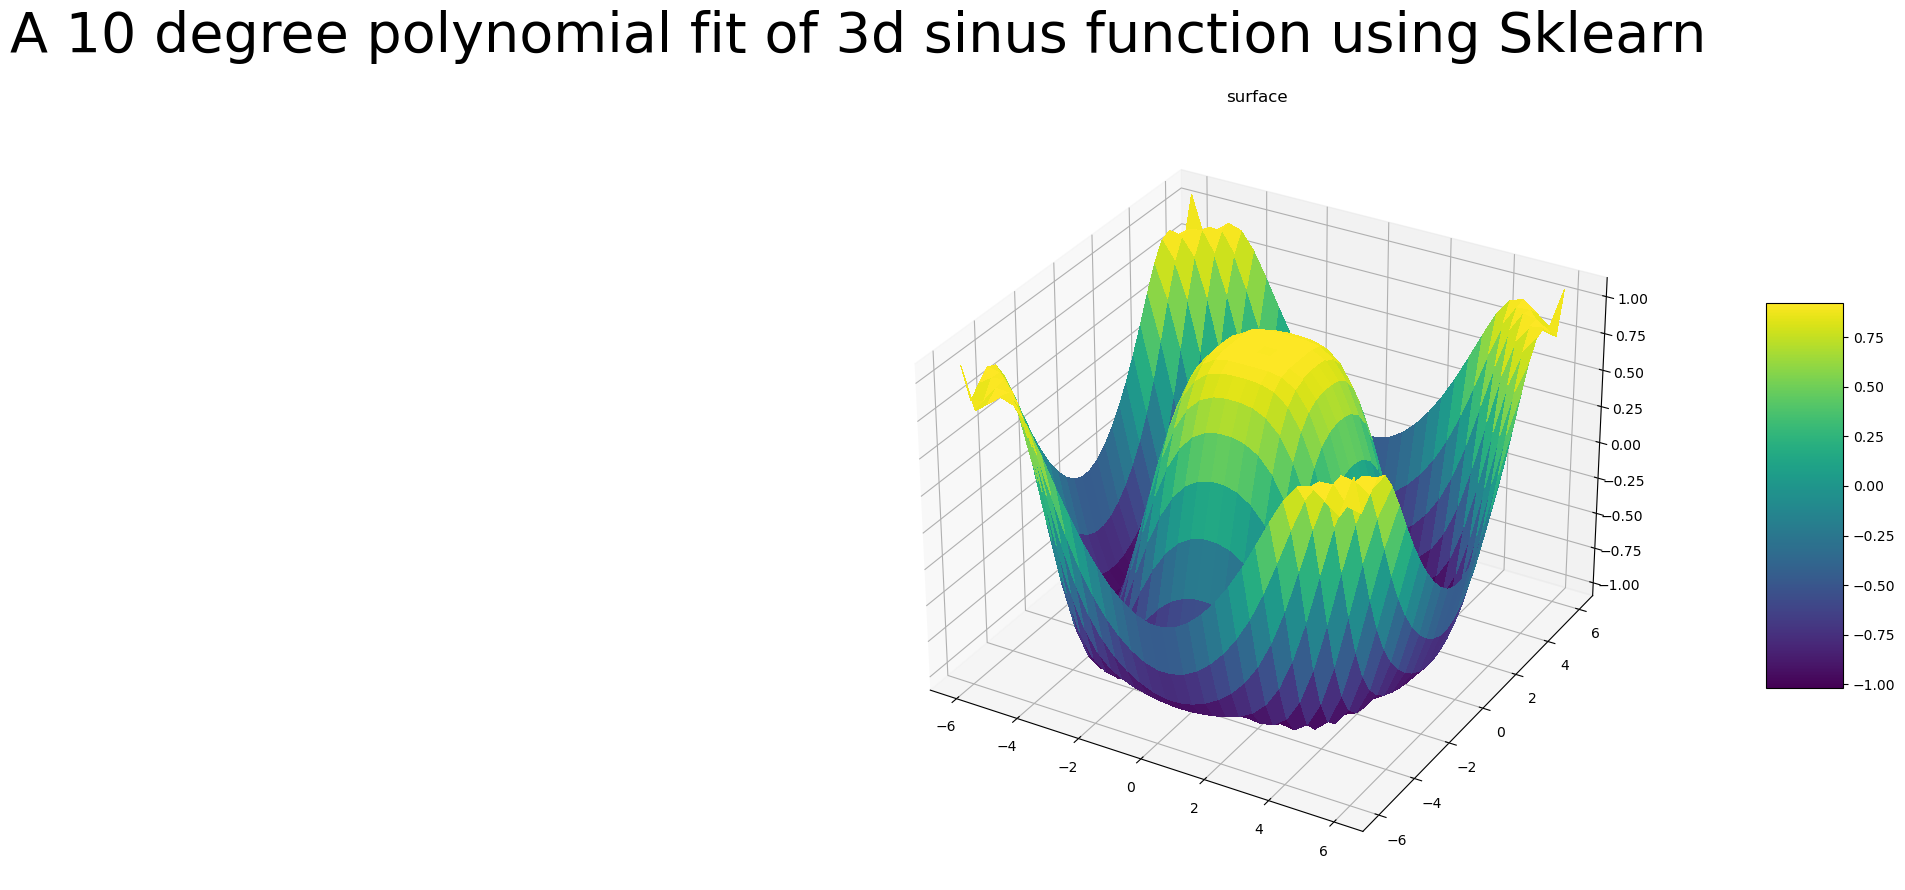

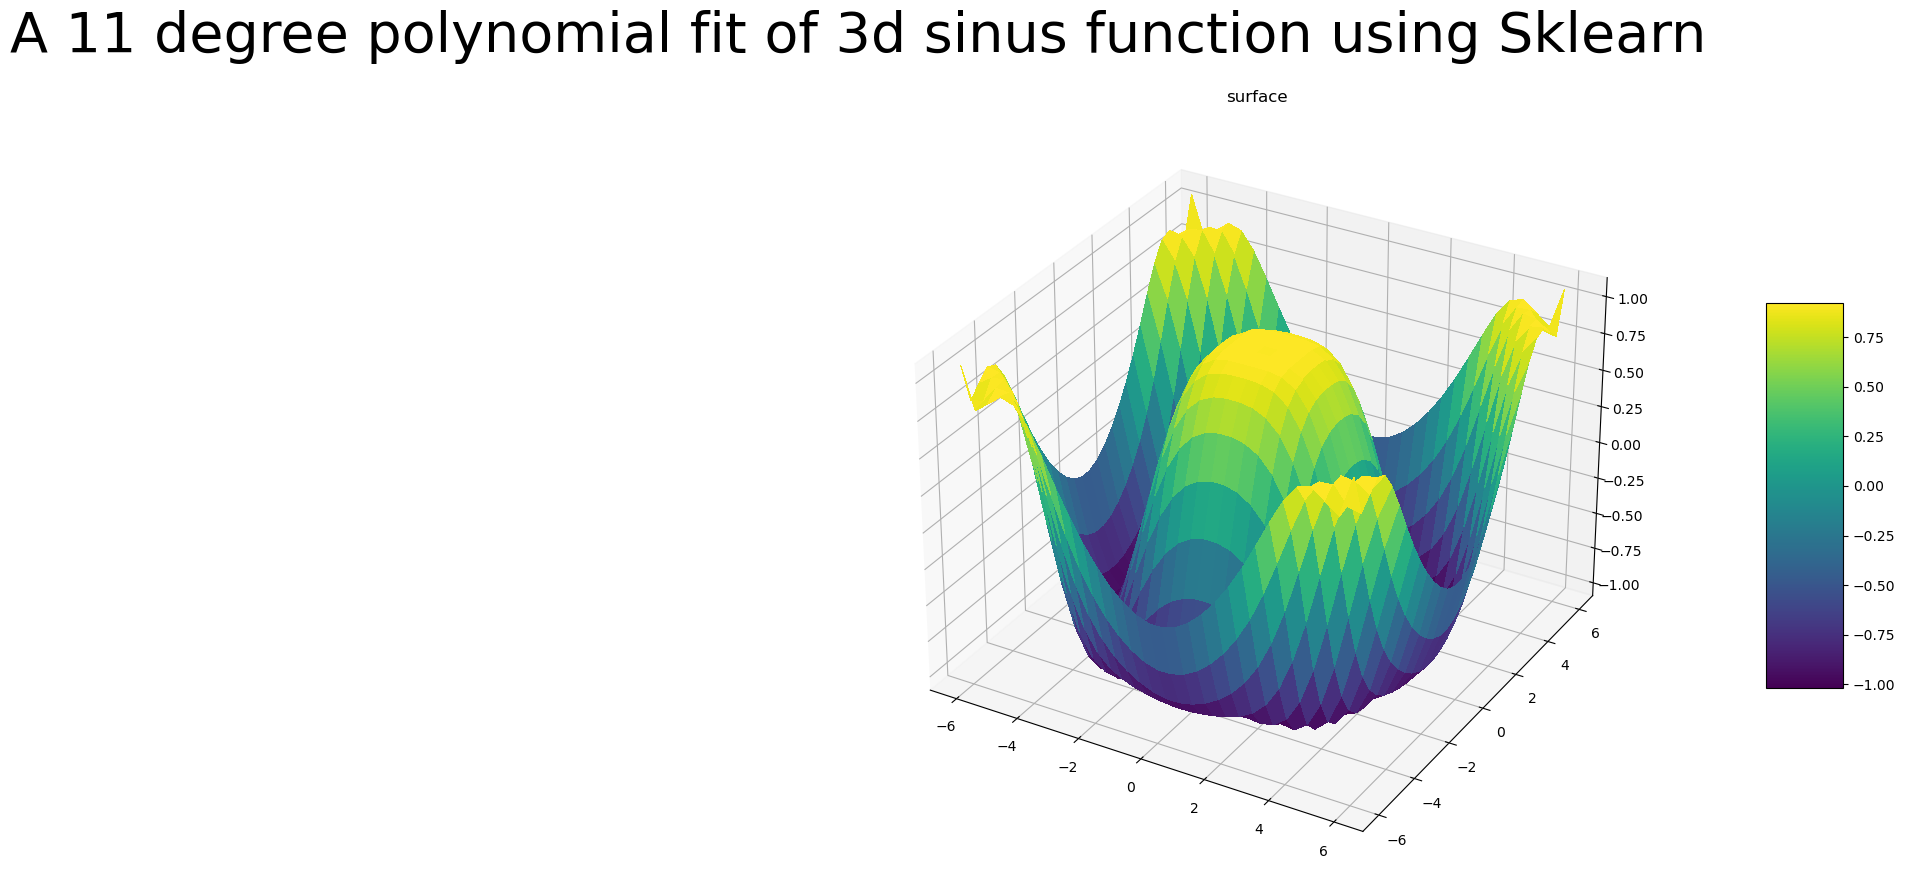

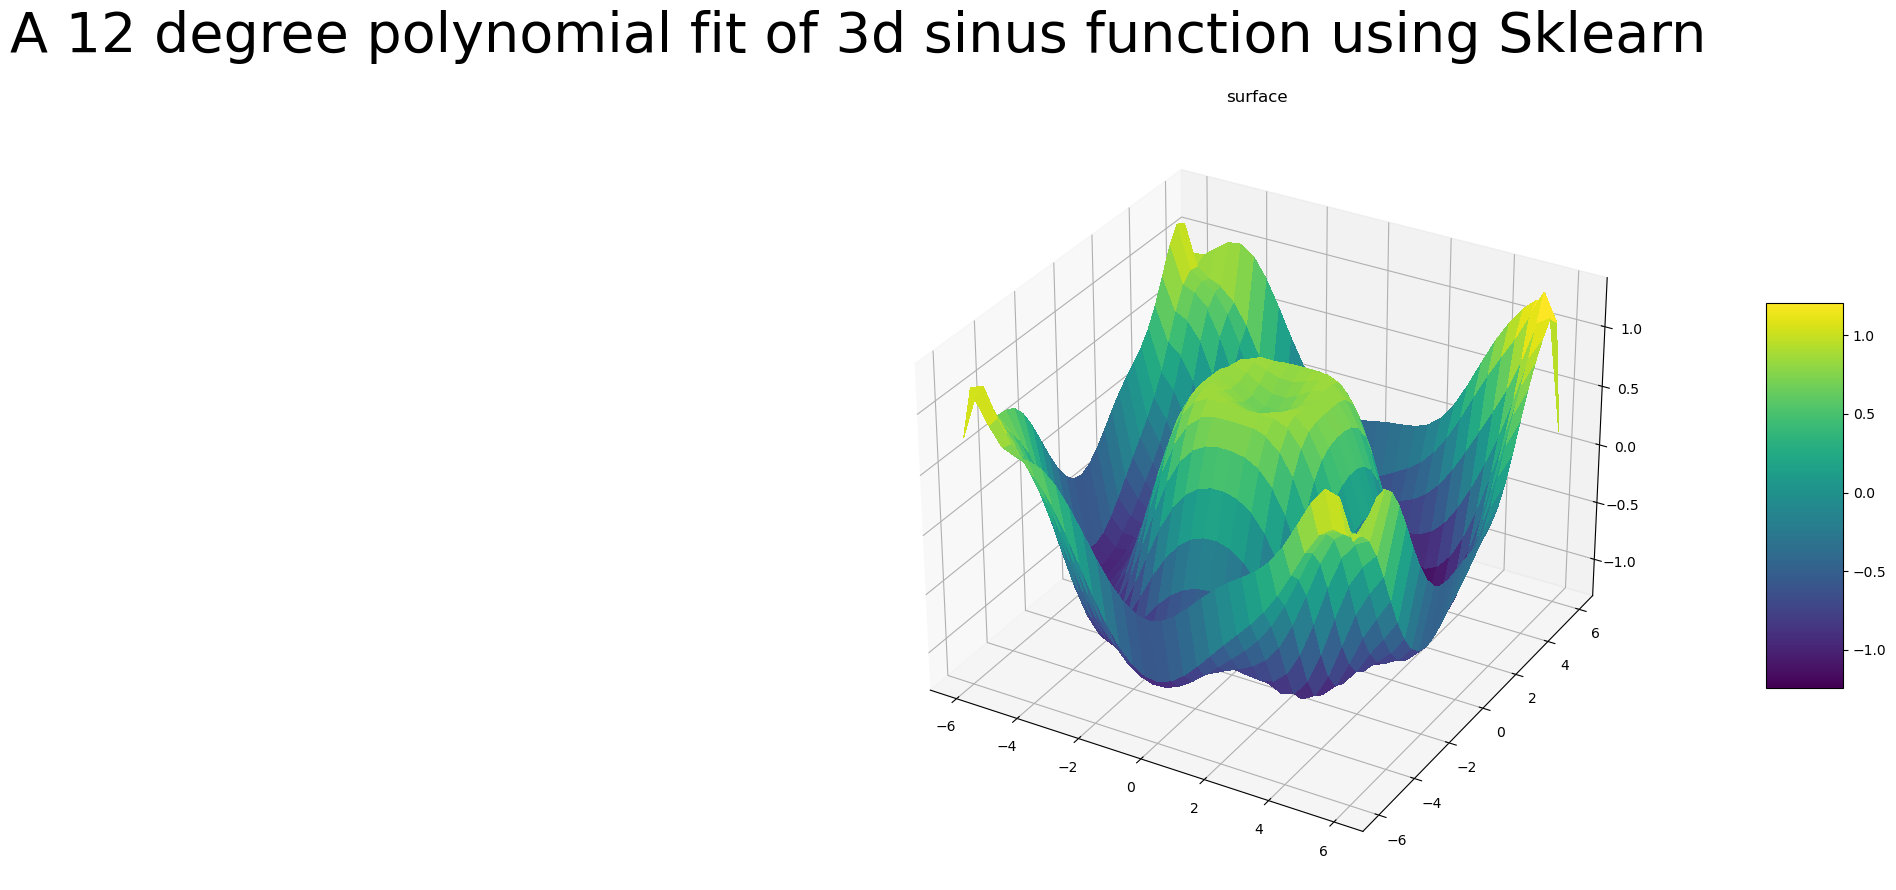

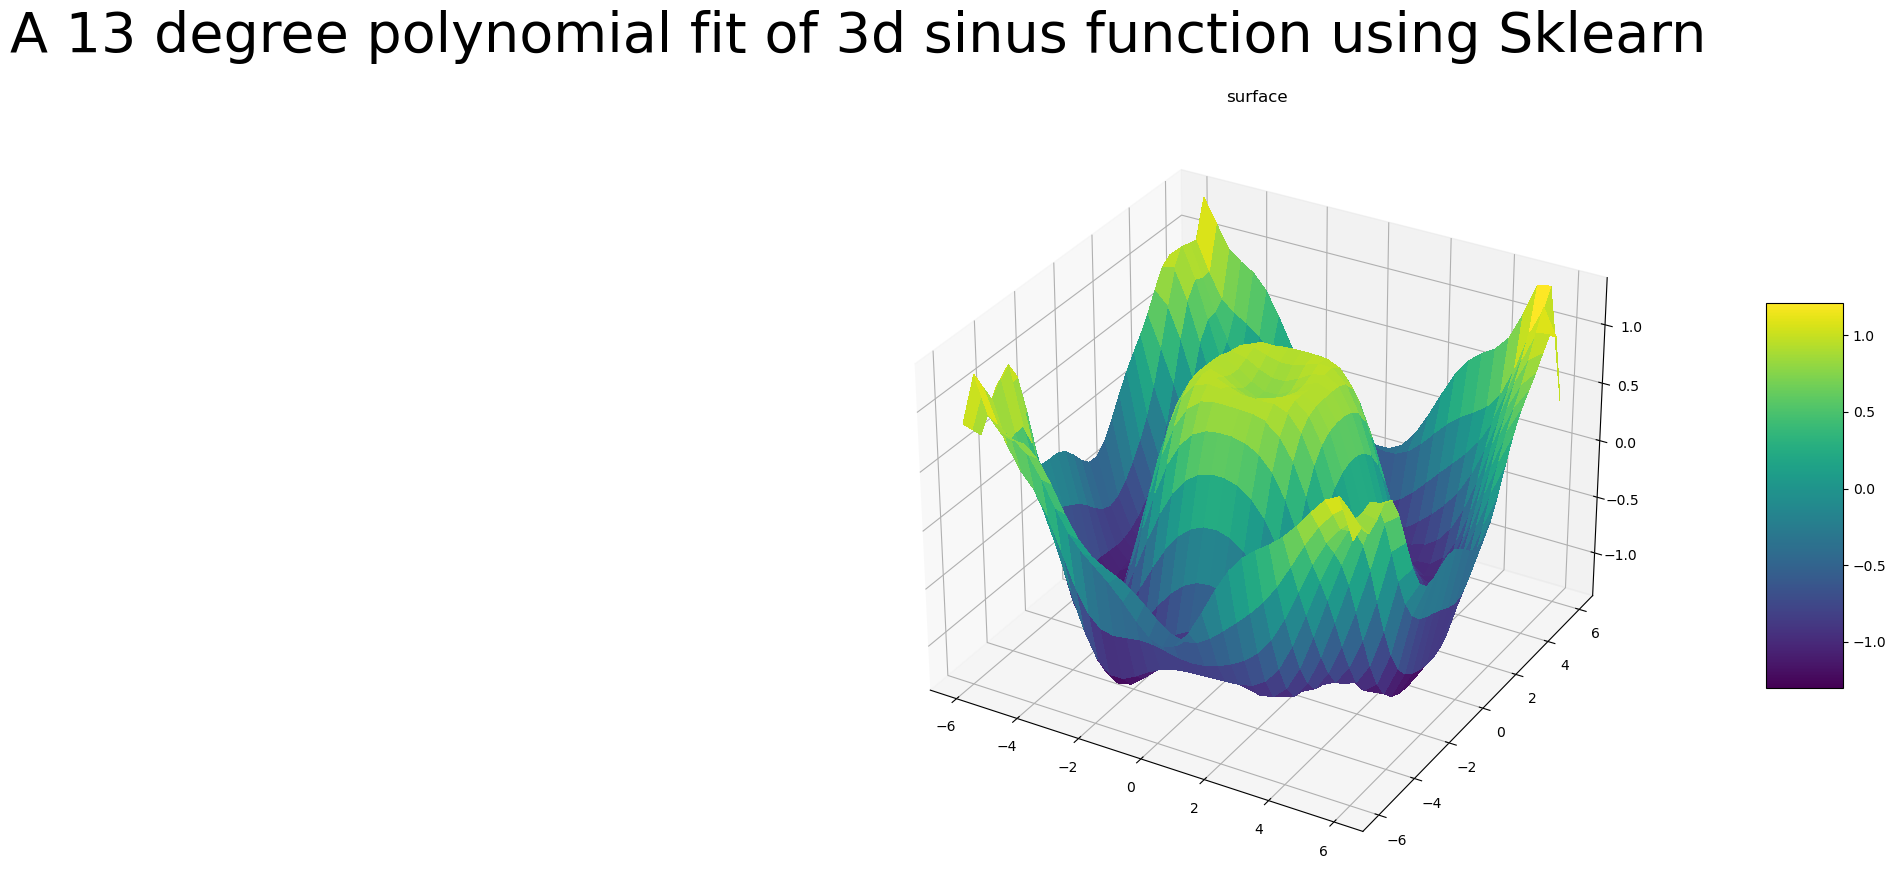

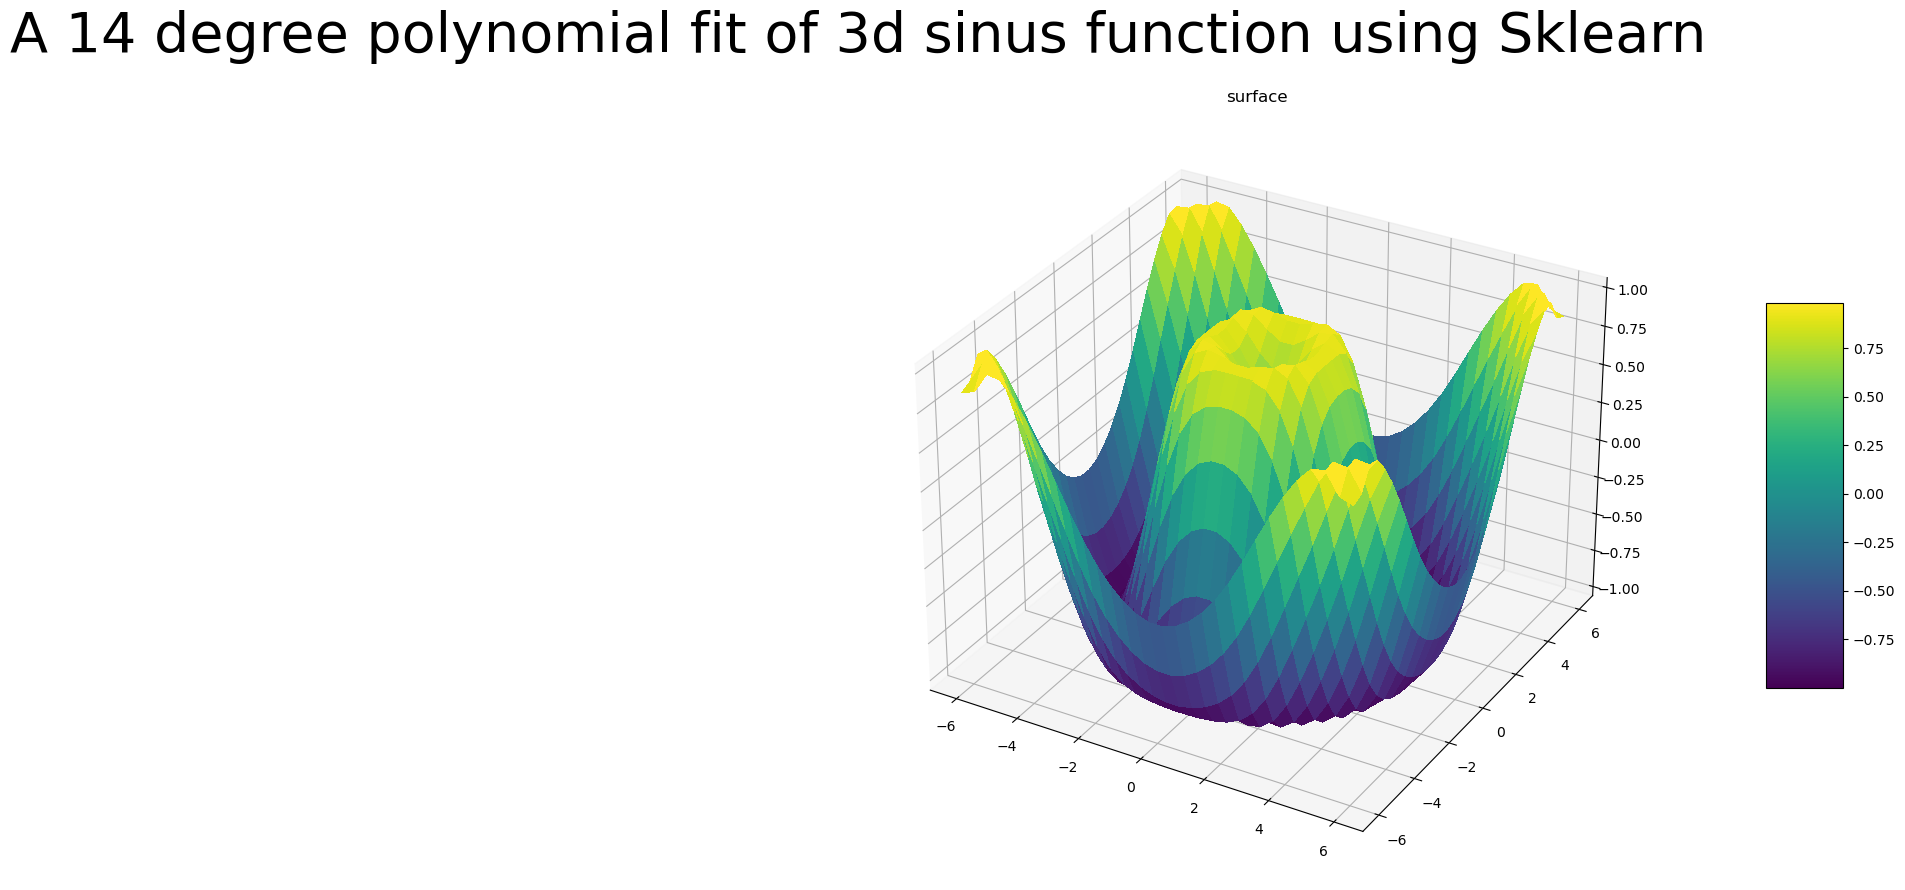

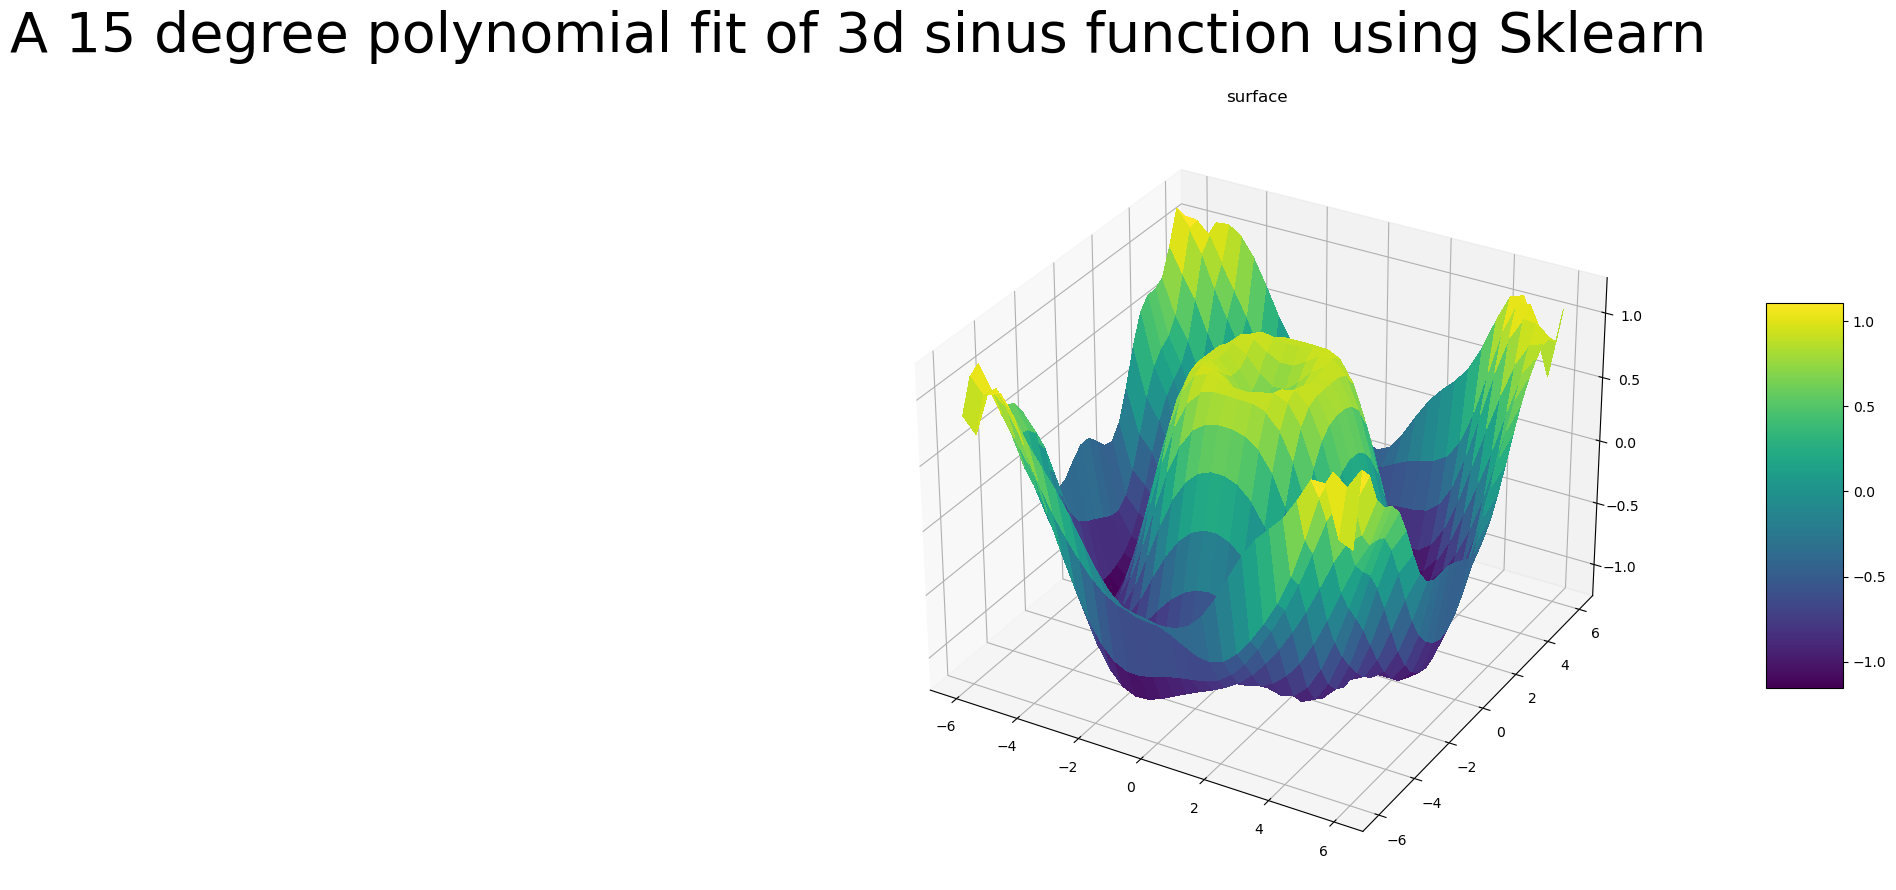

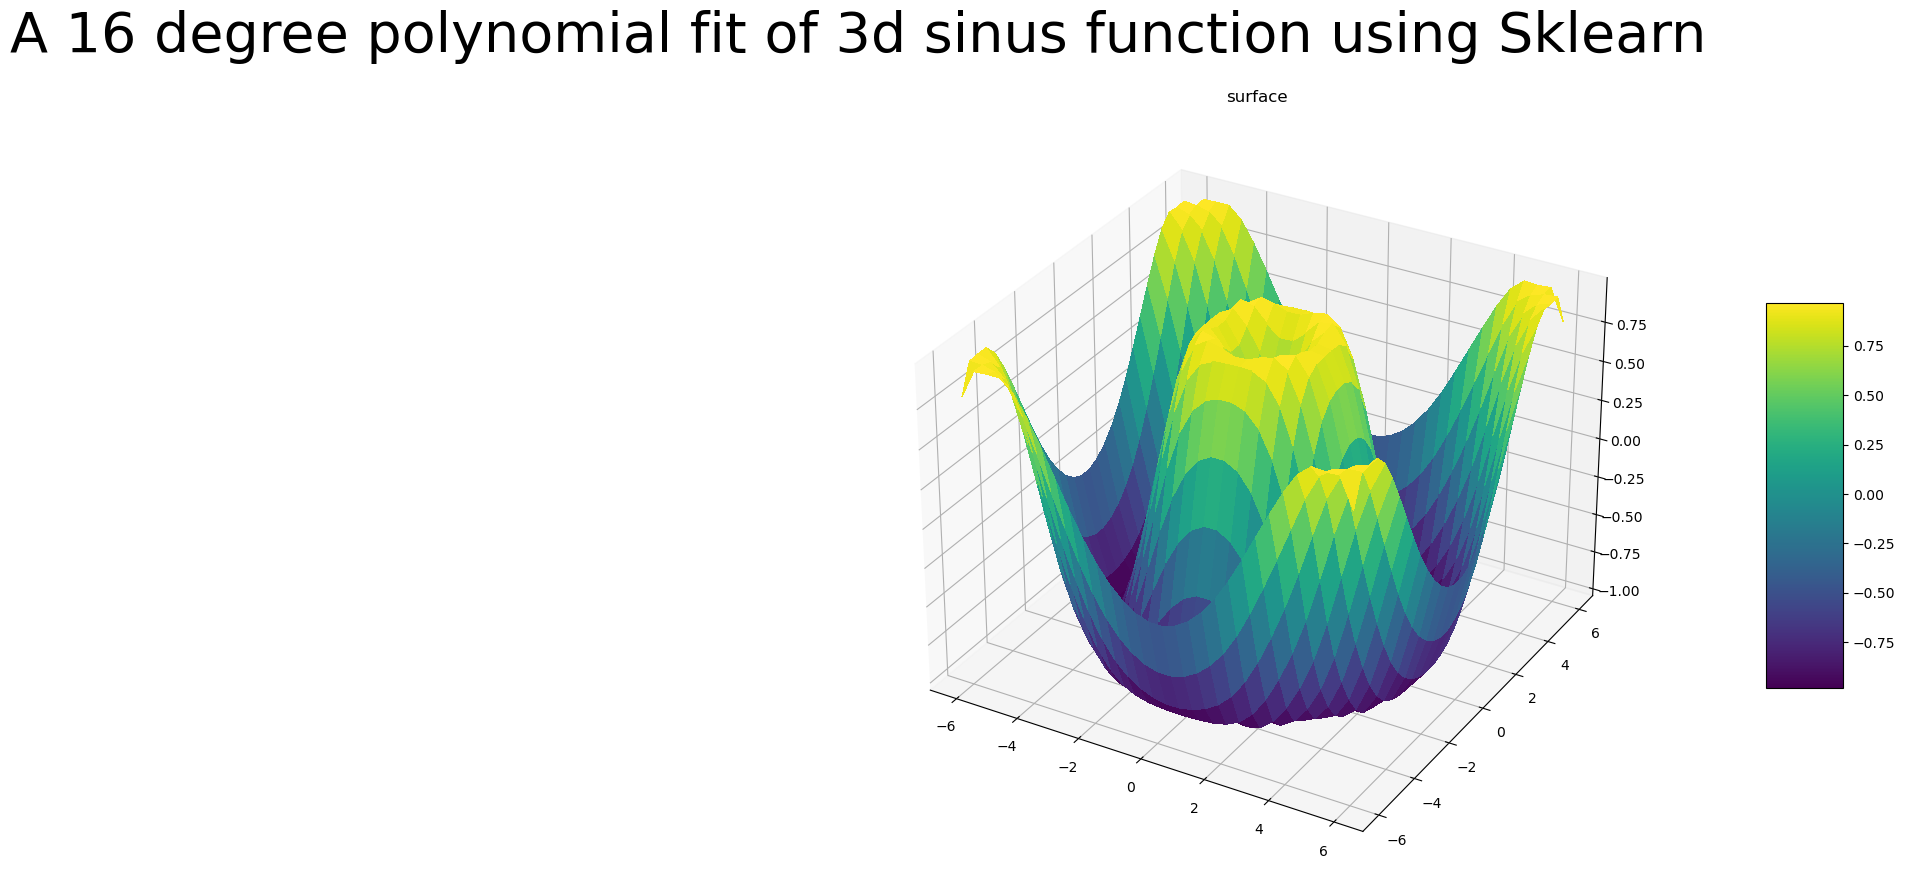

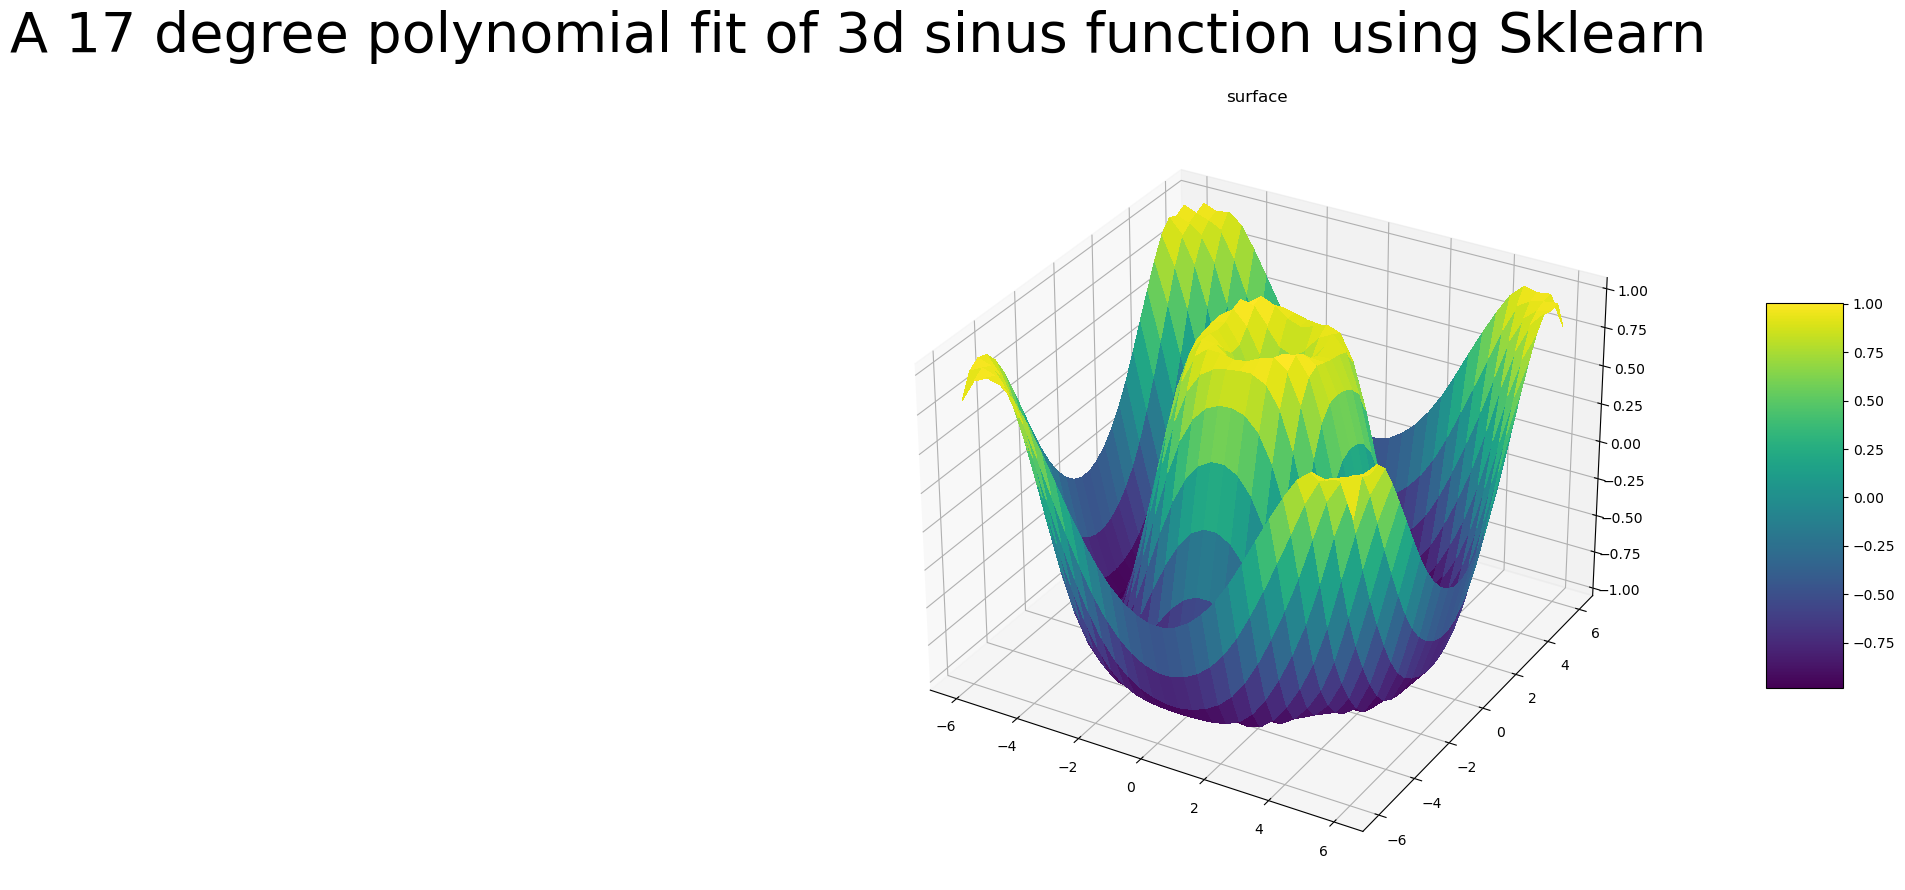

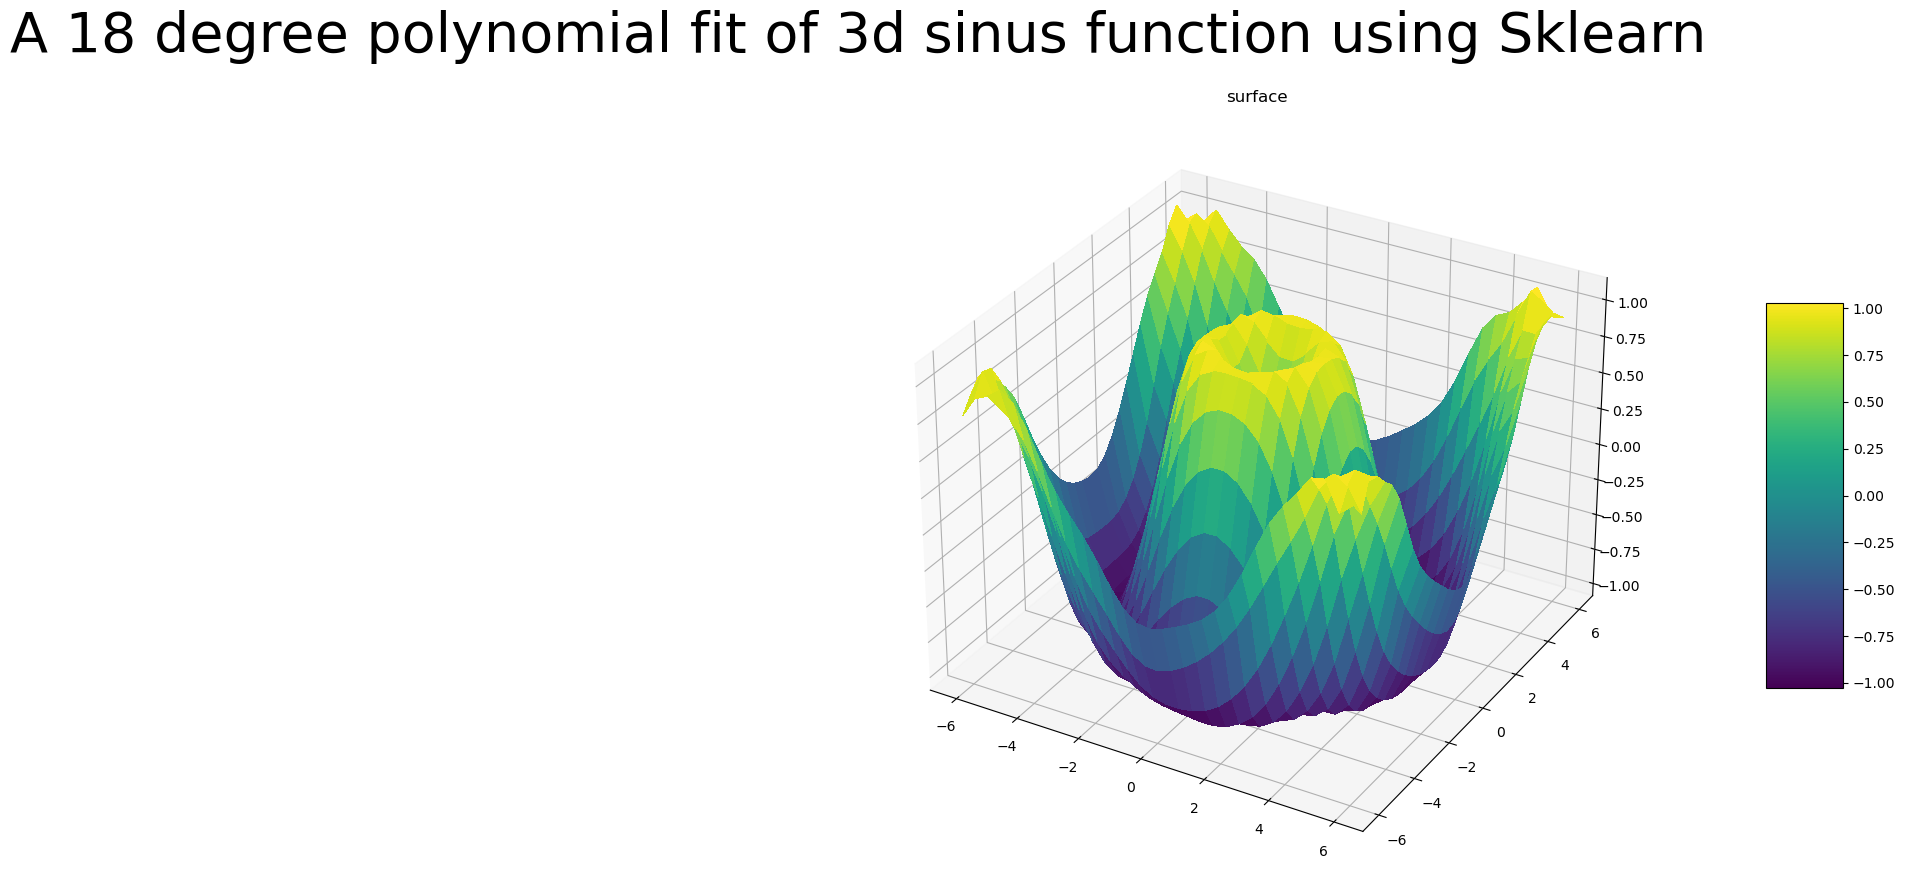

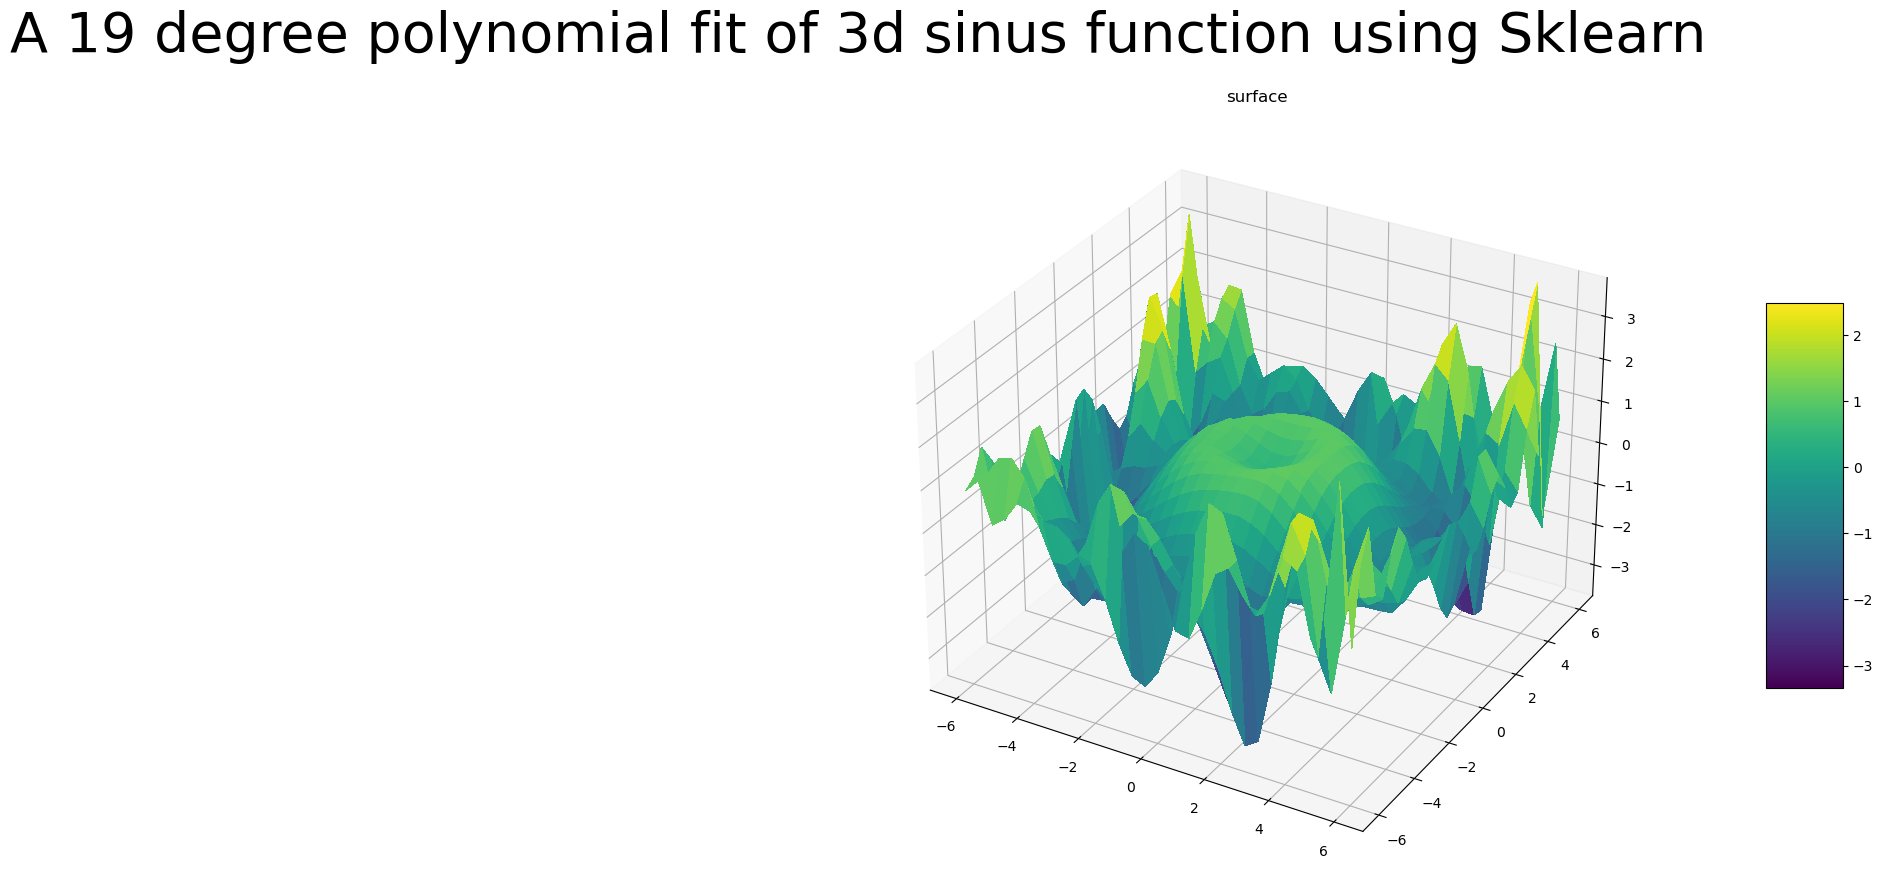

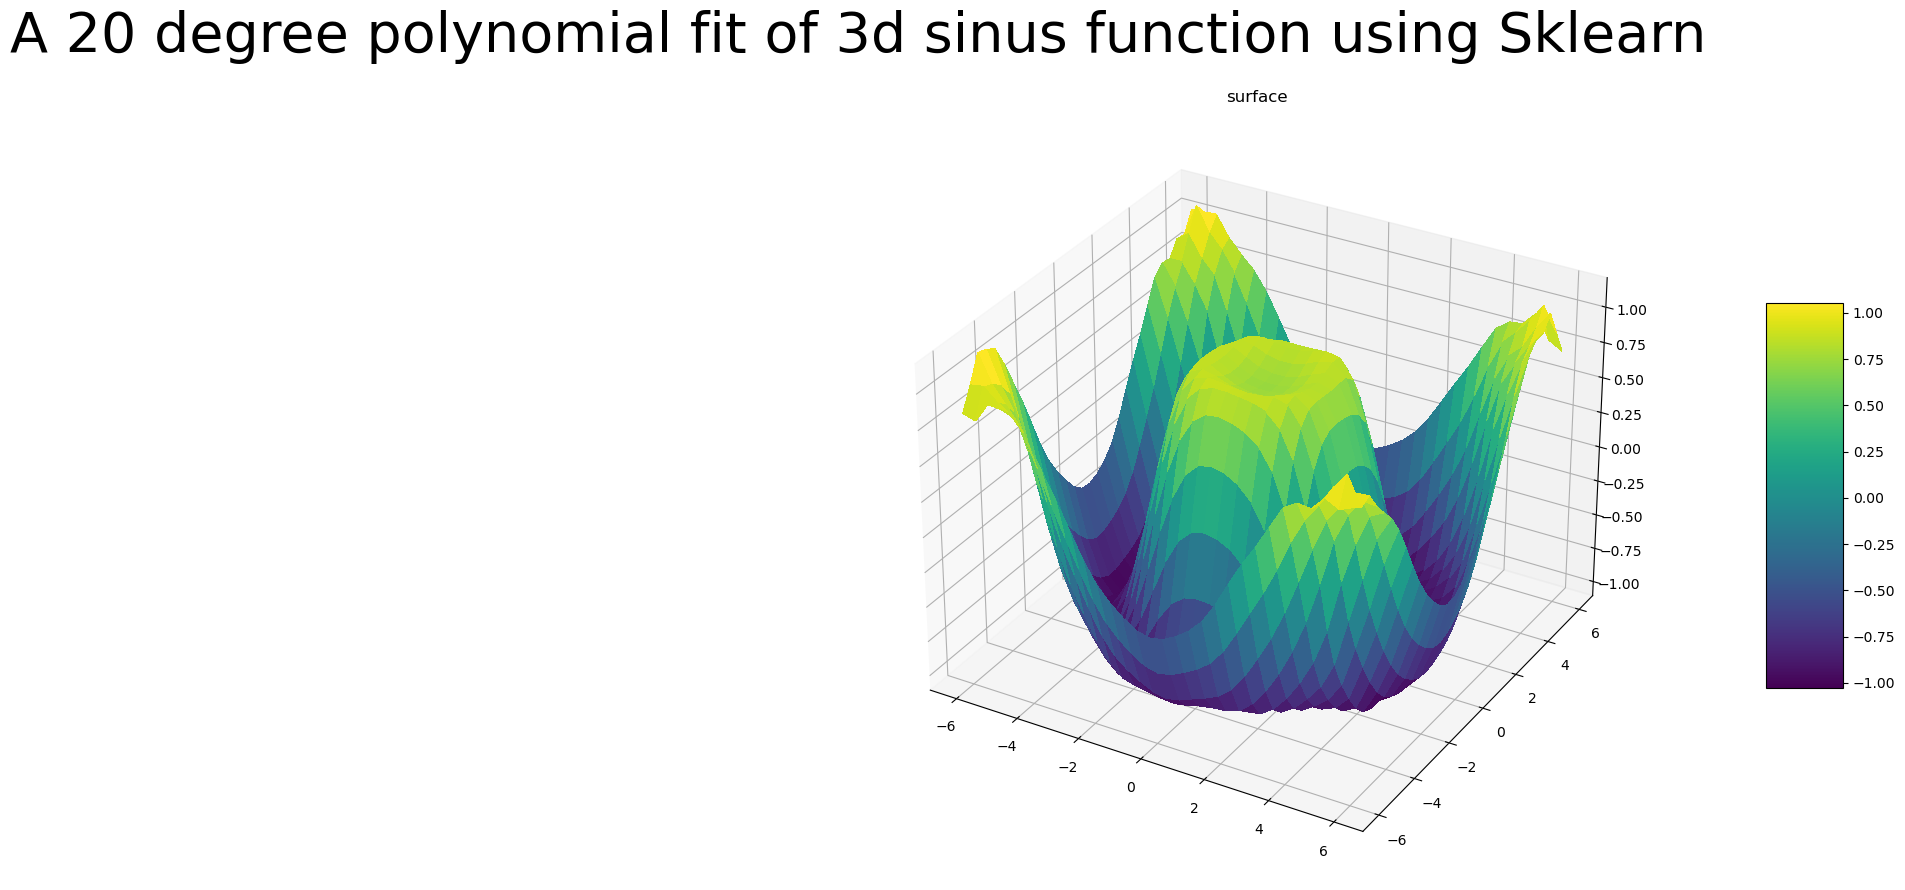

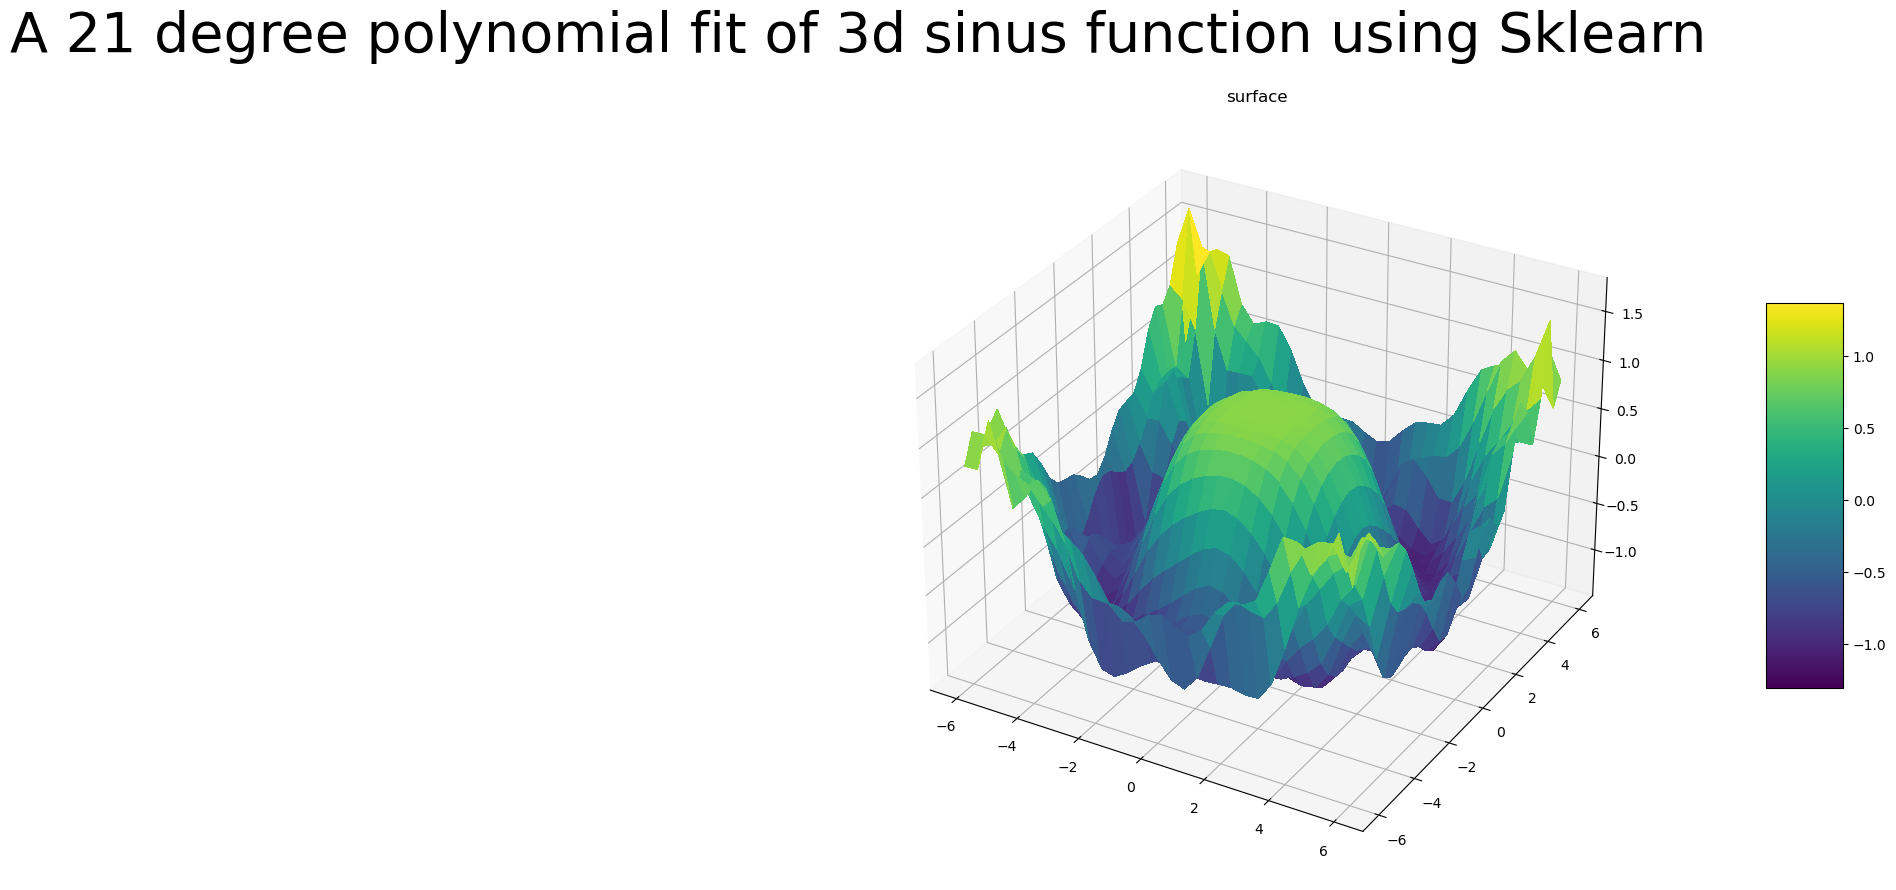

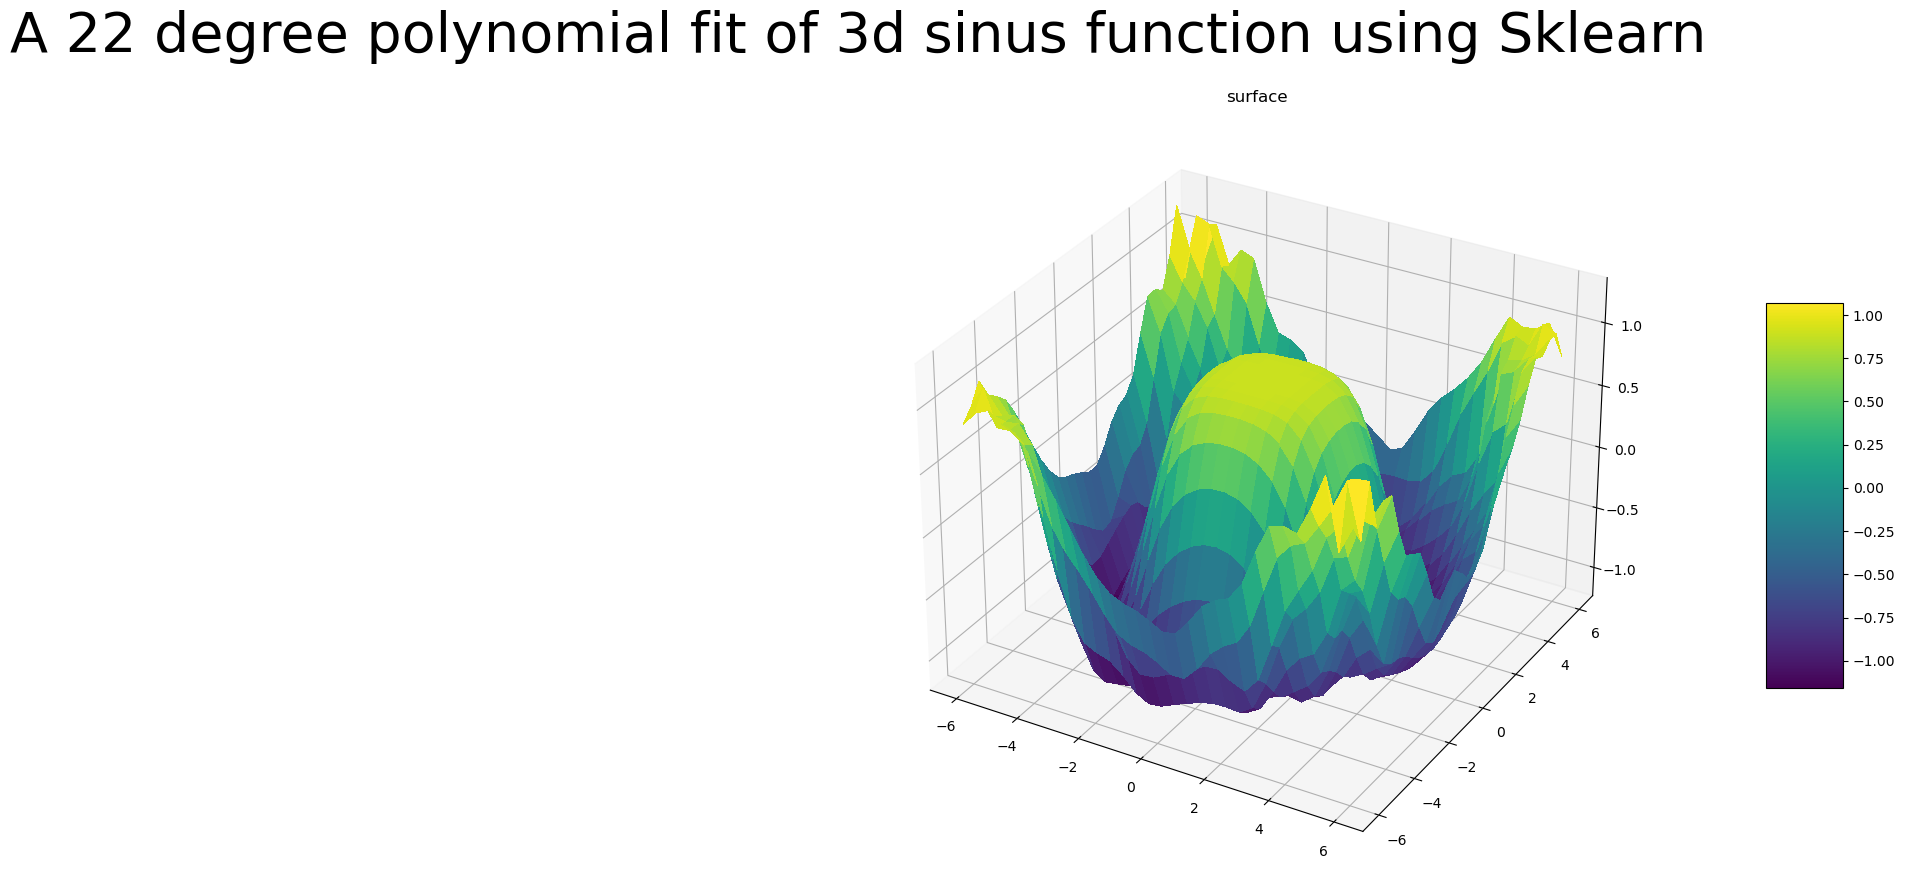

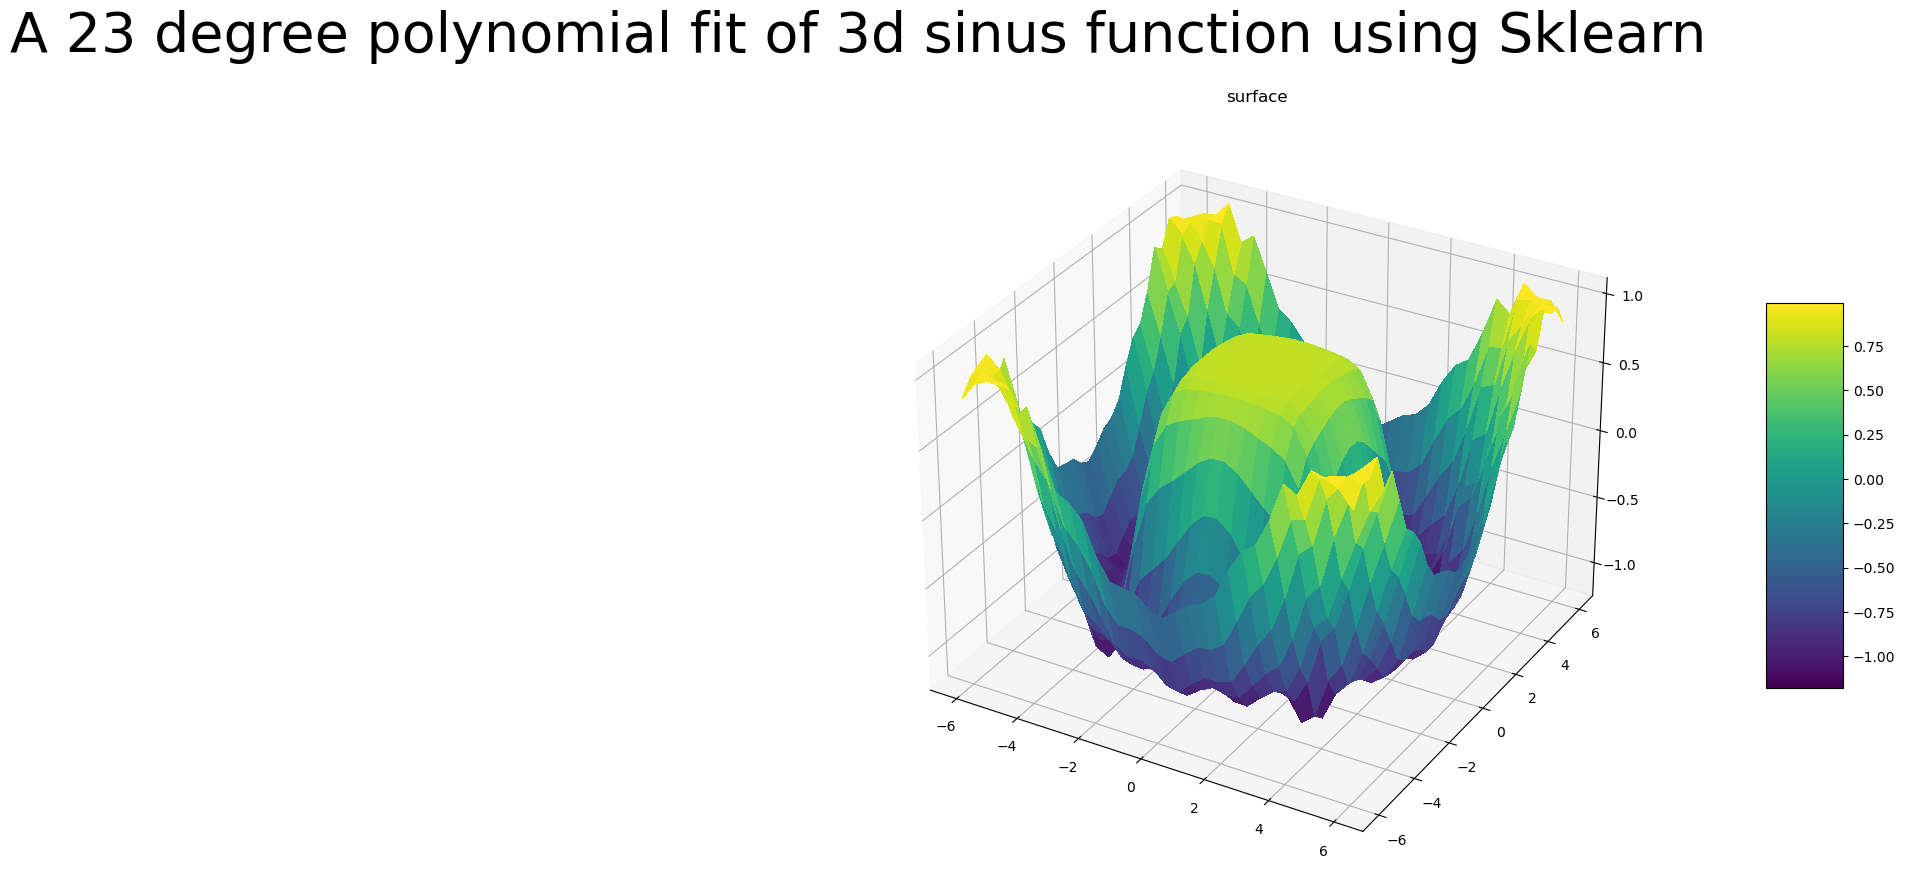

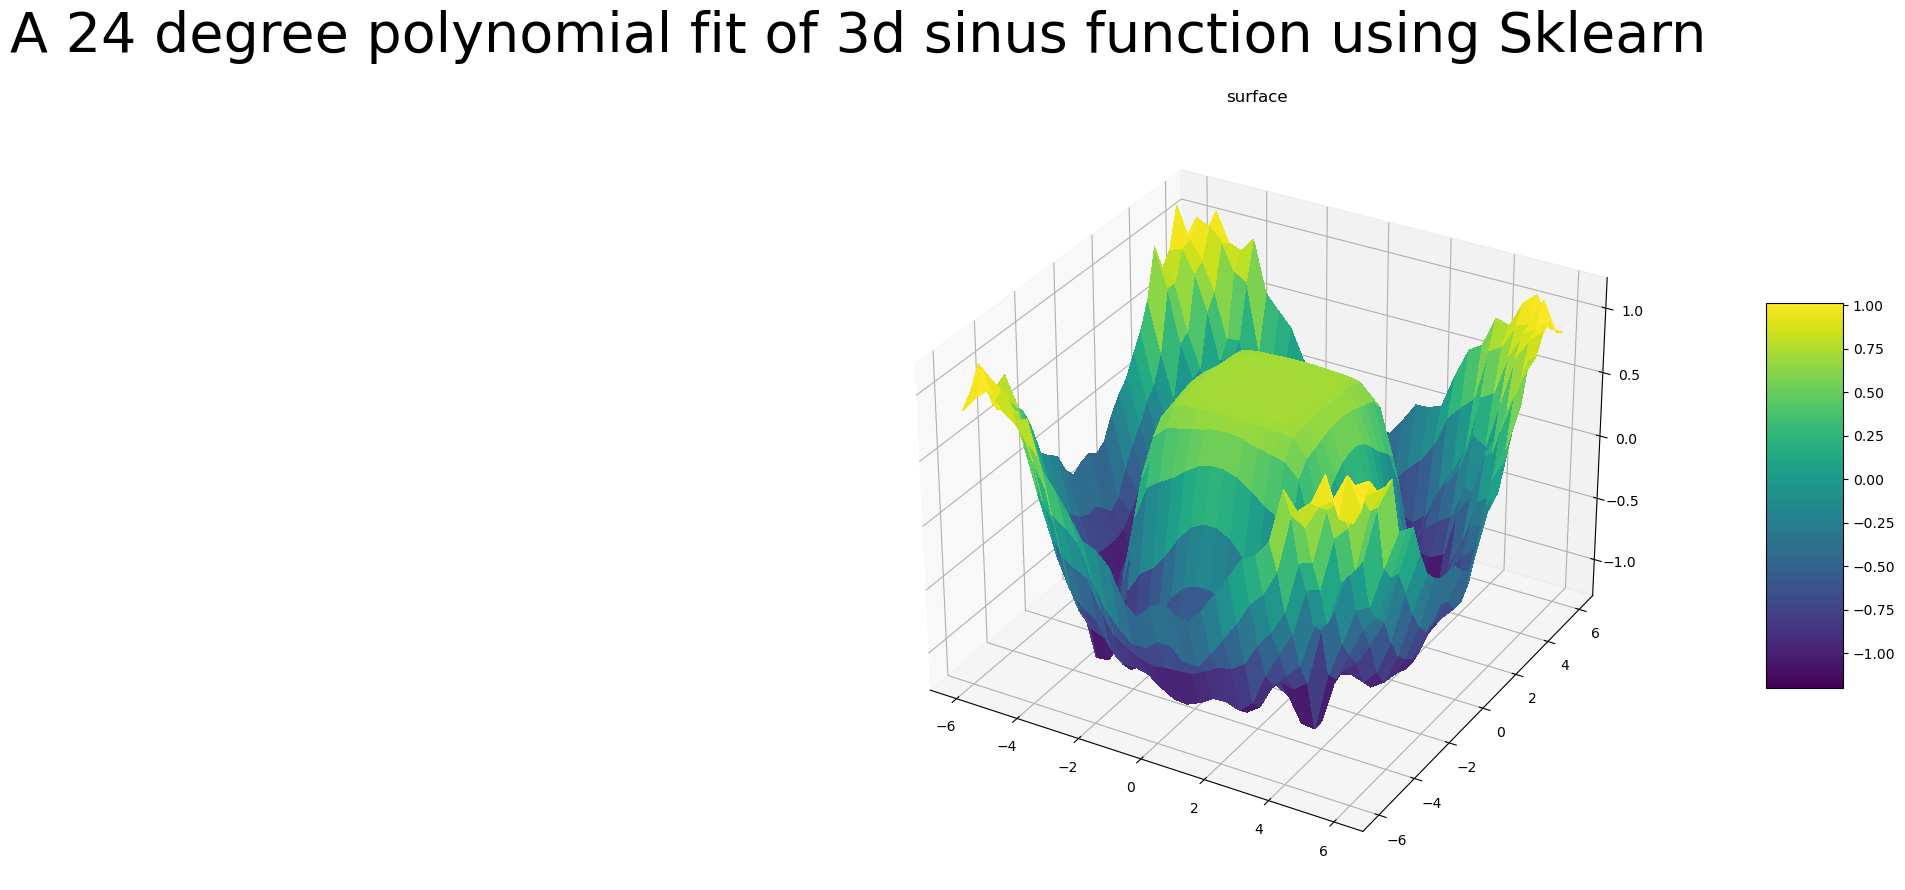

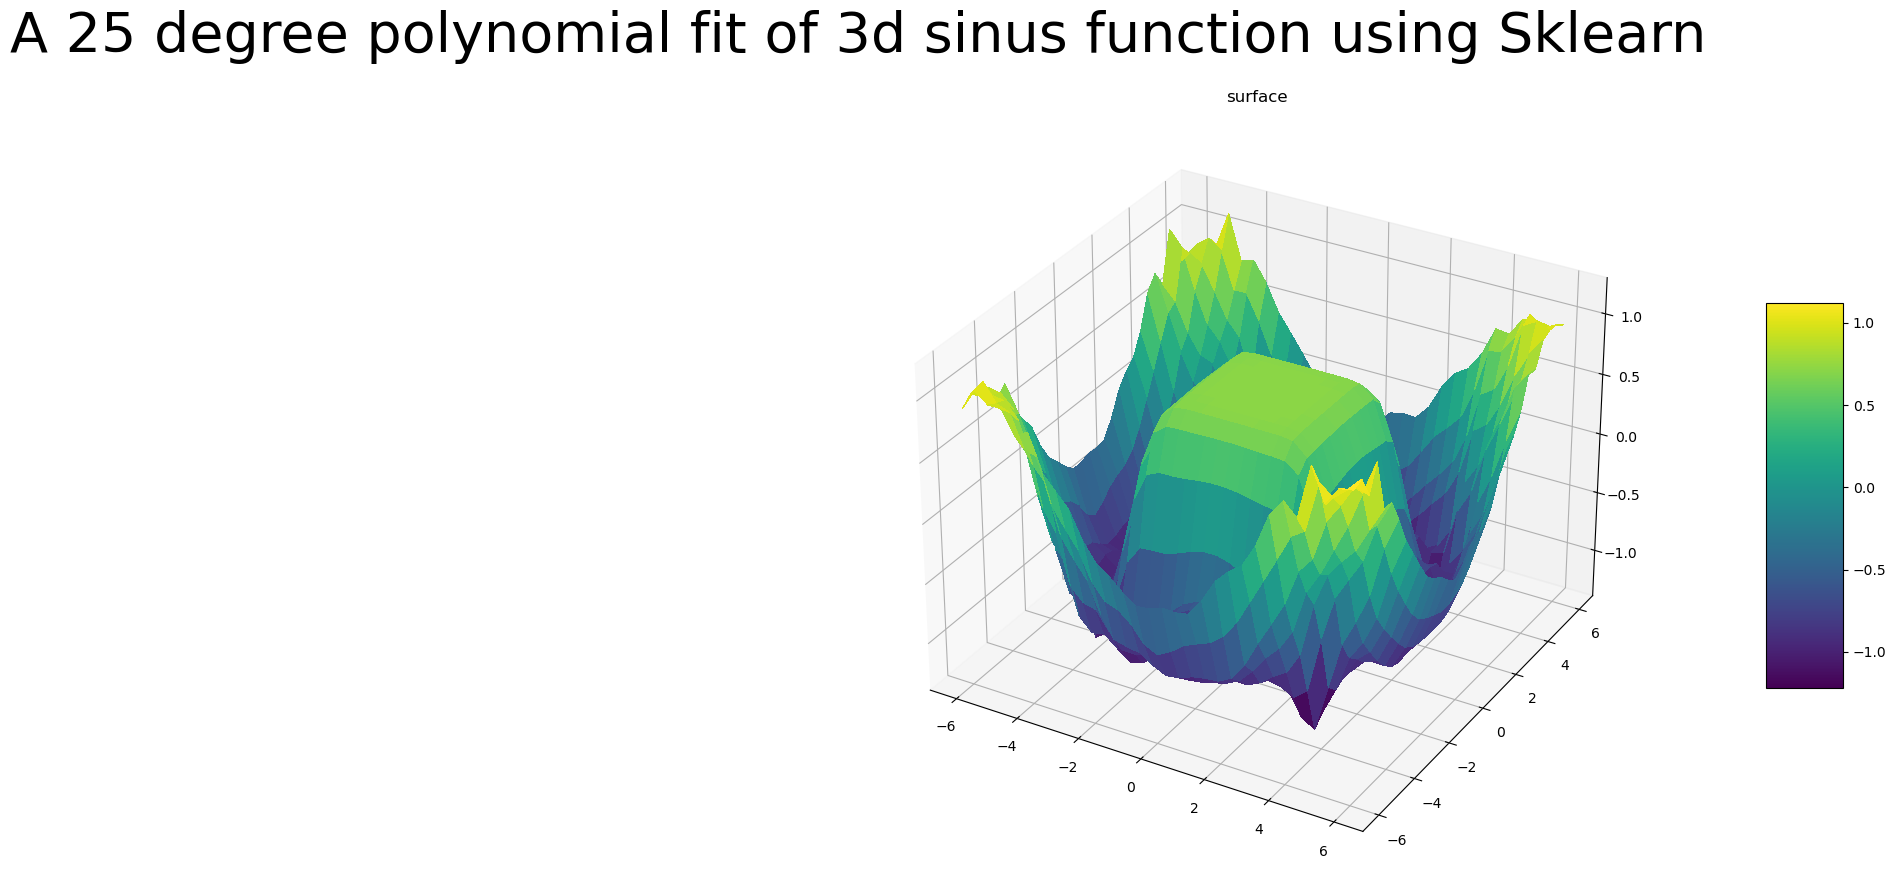

In [11]:
# Polynomial fit
polynomial = 25

# En tom vektor som skal fylles med MSE, R2 og MAE for hver av de 25 polynomtilpassningene vi skal teste.
scores = np.empty((25,3))

# Stacking x and y 
X = np.moveaxis(np.vstack((x_mesh.ravel(), y_mesh.ravel())),0,-1)

for poly in range(polynomial):
    
    polyreg=make_pipeline(PolynomialFeatures(poly+1),LinearRegression())
    polyreg.fit(X,np.expand_dims(z.flatten(),-1))

    z_hat = polyreg.predict(X)

    z_hat_plot = z_hat.reshape(int(math.sqrt(z_hat.shape[0])),int(math.sqrt(z_hat.shape[0])))
    
    fig = plt.figure(figsize=(32,10))
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(x_mesh, y_mesh, z_hat_plot, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none',antialiased=False)
    ax.set_title('surface')
    fig.colorbar(surf,shrink=0.5, aspect=5)
    fig.suptitle("A {} degree polynomial fit of 3d sinus function using Sklearn".format(poly+1) ,fontsize="40", color = "black")
    scores[poly,:] = mean_squared_error(z_hat.ravel(),z.ravel()), r2_score(z_hat.ravel(),z.ravel()), mean_absolute_error(z_hat.ravel(),z.ravel())
    #fig.show()


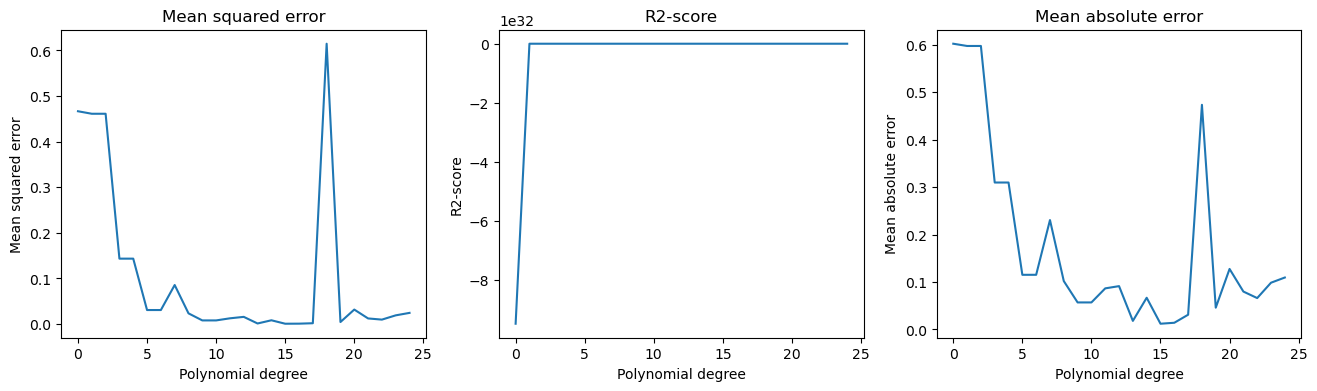

In [12]:
score_names = ["Mean squared error","R2-score","Mean absolute error"]
plt.figure(figsize=(16,4))
for i in range(scores.shape[1]):
    plt.subplot(1, 3, i+1)
    plt.plot(scores[:,i])
    plt.title(score_names[i])
    plt.xlabel("Polynomial degree")
    plt.ylabel(score_names[i])
plt.show()

In [14]:
arg_best_score = [scores[:,0].argmin(),scores[:,1].argmax(),scores[:,2].argmin()]
best_score = [scores[:,0].min(),scores[:,1].max(),scores[:,2].min()]

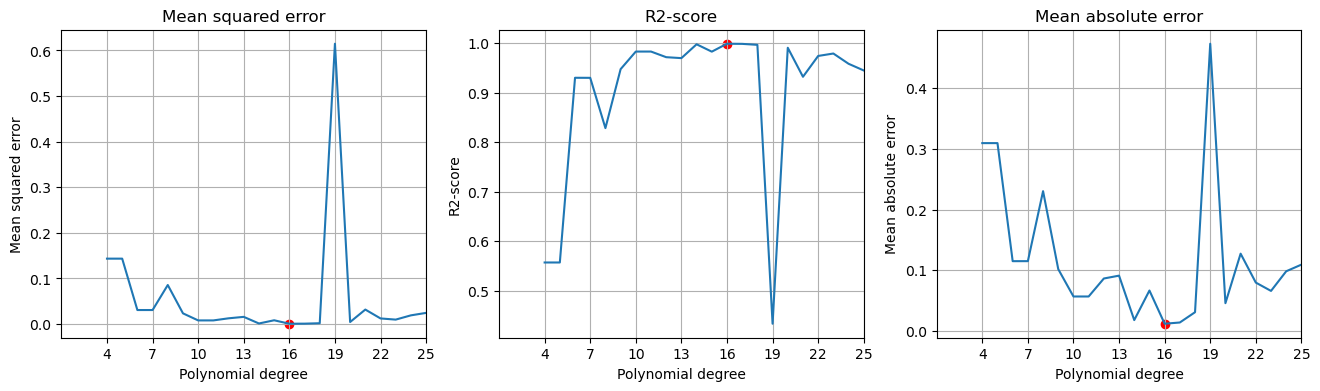

In [15]:
score_names = ["Mean squared error","R2-score","Mean absolute error"]
plt.figure(figsize=(16,4))
start_poly = 3
for i in range(scores.shape[1]):
    plt.subplot(1, 3, i+1)
    plt.plot(np.arange(1+start_poly,26),scores[start_poly:,i])
    plt.xlim(1,25)
    plt.title(score_names[i])
    plt.xticks(np.arange(start_poly+1,26,3))
    plt.xlabel("Polynomial degree")
    plt.ylabel(score_names[i])
    plt.scatter(arg_best_score[i]+1,best_score[i],color="r")
    plt.grid()
plt.show()